In [117]:
# libraries!
import numpy as np      # numpy is Python's "array" library
import pandas as pd     # Pandas is Python's "data" library ("dataframe" == spreadsheet)

In [118]:
# let's read in our flower data...
# 
# for read_csv, use header=0 when row 0 is a header row
# 
filename = 'fanficbodies.csv'
df = pd.read_csv(filename)        # encoding="utf-8" et al.
print(f"{filename} : file read into a pandas dataframe.")

fanficbodies.csv : file read into a pandas dataframe.


In [119]:
#
# a dataframe is a "spreadsheet in Python"   (seems to have an extra column!)
#
# let's view it!
df

,work_id,title,author,rating,category,fandom,relationship,character,additional tags,language,...,status date,words,chapters,comments,kudos,bookmarks,hits,all_kudos,all_bookmarks,body
0,38068225,A Hundred Theories,['genuineformality'],General Audiences,Gen,Six of Crows Series - Leigh Bardugo,Kaz Brekker/Inej Ghafa,"Kaz Brekker, Inej Ghafa","Pre-Canon, Developing Friendships, Kaz Brekker...",English,...,2022-03-31,2091,1/1,32.0,82.0,4.0,387,"['majeda', 'crackbaby13', 'Starryskyondragonsb...",[],"\n\nKaz hated a puzzle he couldn't solve, and ..."
1,38010298,i'll tell you all about it (when i see you again),['people_watching'],Not Rated,NaN,Six of Crows Series - Leigh Bardugo,"Matthias Helvar/Nina Zenik, Kaz Brekker/Inej G...","Matthias Helvar, Wylan Van Eck, Inej Ghafa, Ni...","Post-Book 2: Crooked Kingdom, Spoilers for Cro...",English,...,2022-03-31,2656,3/6,4.0,17.0,1.0,258,"['carry_on_simon', 'Elevatornotworthy_1', 'Oli...",[],Matthias can barely hear himself think with th...
2,35211865,Where Do Broken Hearts Go?,['RupturedHaven'],General Audiences,"F/M, M/M, Multi","The Grisha Trilogy - Leigh Bardugo, Shadow and...","Kaz Brekker/Inej Ghafa, Jesper Fahey/Wylan Van...","Kaz Brekker, Inej Ghafa, Jesper Fahey, Wylan V...","Kanej - Freeform, Six of Crows, Grishaverse, s...",English,...,2022-03-30,38366,17/?,70.0,328.0,33.0,7125,"['Lucixeve', 'sjonsson97', 'crowandcup', 'Guew...",[],\n~\n1\n~\n\n\n\nINEJ\n\n\nInej held the door ...
3,38027824,Kanej oneshots to fill the hole in my heart,['itsraingcatsanddogs'],Teen And Up Audiences,Multi,"Six of Crows Series - Leigh Bardugo, The Grish...","Kaz Brekker/Inej Ghafa, Kaz Brekker & Inej Ghafa","Kaz Brekker, Inej Ghafa, Original Kaz Brekker/...","Kanej - Freeform, Post-Book 2: Crooked Kingdom...",English,...,2022-03-30,1915,2/?,NaN,4.0,NaN,294,['IReadBooksForFun'],[],It was a busy day in the Barrel. It was always...
4,38066179,save me from myself (don't let me down),['xxartistintrainingxx'],Teen And Up Audiences,M/M,Six of Crows Series - Leigh Bardugo,Jesper Fahey/Wylan Van Eck,"Wylan Van Eck, Jesper Fahey","Nightmares, Hurt/Comfort, Angst, Wylan Van Eck...",English,...,2022-03-30,2174,1/1,4.0,36.0,4.0,397,"['ThatOddNerd', 'bee_slut', 'Reader2005', 'Boo...",[],Wylan gasped and thrashed as he struggled to s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,38106892,All Mine (and His),['maraudersaffair'],Explicit,F/M,Harry Potter - J. K. Rowling,"Hermione Granger/Draco Malfoy, Hermione Grange...","Hermione Granger, Draco Malfoy, Charlie Weasley","Threesome - F/M/M, Polyamory, Getting Together...",English,...,2022-04-01,5019,1/1,2.0,73.0,9.0,1916,"['Cookiemom14', 'JamesLethe', 'Trichardson', '...",[],Hermione wanted a baby. She wanted to be a mot...
382,38106853,La bibliotheque aux mille livres,['NekoKirei'],Teen And Up Audiences,Other,Harry Potter - J. K. Rowling,NaN,"Ginny Weasley, Theodore Nott",Tom Riddle's Diary,Francais,...,2022-04-01,422,1/1,NaN,2.0,NaN,4,[],[],"Elle avait juste besoin de s'asseoir, loin de ..."
383,37316926,Jack's Snowflake,['TheologyDiscography'],General Audiences,Gen,"Harry Potter - J. K. Rowling, Rise of the Guar...",Jack Frost (Guardians of Childhood)/Harry Potter,"Harry Potter, Jack Frost (Guardians of Childhood)","Pre-Canon, Canonical Child Abuse, Fluff, Hurt/...",English,...,2022-04-01,1906,6/?,8.0,99.0,29.0,916,"['jaskier09', 'ItsBiancaNeve', 'CatNip_618', '...",[],Jack dropped to the ground next to the li...
384,31236521,In the Shadows (Wizarding War),['CL_Avery'],Mature,"F/M, Multi",Harry Potter - J. K. Rowling,"Sirius Black/Original Female Character(s), Jam...","Original Characters, Sirius Black, James Potte...","Wizarding Wars (Harry Potter), Order of the Ph...",English,...,2022-04-01,134525,24/?,36.0,50.0,15.0,1941,"['LaInternettuale', 'Darie1_6', 'Lady_Murphyy'...",[],\n\n\n\n\n\nClaudia opened her eyes and glance...


In [120]:
#
# Looking at the result, above, we see some things that need to be "tidied":
#
# [1] there's an extra column (holding the reference url)
#
#
# let's look at the dataframe's "info":
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   work_id          386 non-null    int64  
 1   title            386 non-null    object 
 2   author           386 non-null    object 
 3   rating           386 non-null    object 
 4   category         366 non-null    object 
 5   fandom           386 non-null    object 
 6   relationship     360 non-null    object 
 7   character        359 non-null    object 
 8   additional tags  357 non-null    object 
 9   language         386 non-null    object 
 10  published        386 non-null    object 
 11  status           386 non-null    object 
 12  status date      386 non-null    object 
 13  words            386 non-null    int64  
 14  chapters         386 non-null    object 
 15  comments         314 non-null    float64
 16  kudos            373 non-null    float64
 17  bookmarks       

In [121]:
# Let's look at the dataframe's columns:
df.columns

Index(['work_id', 'title', 'author', 'rating', 'category', 'fandom',
       'relationship', 'character', 'additional tags', 'language', 'published',
       'status', 'status date', 'words', 'chapters', 'comments', 'kudos',
       'bookmarks', 'hits', 'all_kudos', 'all_bookmarks', 'body'],
      dtype='object')

In [184]:
def rating(df):
    #Ao3 only lets people kudo once on a chapter so I divide the hits by num_chapters. 
    # the true rating is probably close to taking the hits/kudos(likes) 
    # the highest kudos does not necessarily mean best read.
    # returns highest rating, and kudo
    # the smaller the number the better
    max_title = ""
    min_rating = 1000
    max_kudo = 0 
    Max_kudo_title = ""
    for i in range(len(df)):
        chapter = df['chapters'][i]
        chapter = str(chapter)
        chapter = chapter.split('/') # take the first chapter
        num_chapters = int(chapter[0])
        hits = df['hits'][i]
        kudos = df['kudos'][i]

        rating = (hits/num_chapters)/kudos
#             rating = kudos/hits

        print(df['title'][i], rating)
        if rating < min_rating:
            min_rating = rating
            max_title = df['title'][i]
            max_chapter = num_chapters
        if kudos > max_kudo:
            max_kudo = kudos
            Max_kudo_title = df['title'][i]
    print(f'The max rated fic is {max_title} with a rating of {min_rating} with {max_chapter} chapters')
    print(f'The max kudoed fic is {Max_kudo_title} with {max_kudo} kudos')
    

In [185]:
rating(df)

A Hundred Theories 4.719512195121951
i'll tell you all about it (when i see you again) 5.0588235294117645
Where Do Broken Hearts Go? 1.2777977044476327
Kanej oneshots to fill the hole in my heart 36.75
save me from myself (don't let me down) 11.027777777777779
You fell from the tree again, didn't you? 6.625
Que chantent les mots 0.9006535947712418
every little thing they do is magic 5.203252032520325
You knew them 3.266666666666667
Of Coffee And Crows 1.9569060773480662
Between Two Lungs 2.2646153846153845
Ketterdam University's Secrets 1.7467741935483871
Son rire en bouteille 1.7727272727272727
loyalty is thicker than blood 5.295454545454546
Three of Pentacles 1.7824978759558199
group names (and the good luck thing) 5.290322580645161
Vengeance Oscars 10.666666666666666
The Pugilist's Creed 1.508178672538534
The Harbour Waters 7.5
"Let me die, but first, let me feel blinding hope" 1.9488491048593348
I'm over my head 4.833333333333333
Street lights, are they talking? 10.84375
A night at

Patience, Grasshopper 6.666666666666667
Wu Ren Gou Dai nan
The Great MI6 Bake Off 1.1273291925465838
Orpheus 1.2789968652037618
00Q | An Explorer in OctaviaZai Ao Ta Wei Ya De Tan Xian Jia 36.0
Zhuan Xian Dian Hua 6.625
We're the Smoke Where There's Fire 2.650959860383944
knock knock knockin on (hell's) door 7.977011494252873
December, Book II, Crystal Claws 27.0
Inverno dei fiori. 10.925925925925926
Randomly Generated Stories #2 3.2958333333333334
Mission: Possible 007 3.7666666666666666
The various lives of John Watson 2.2721354166666665
Mo Lu Tian Tang 2.638888888888889
I think he loves you 4.495689655172414
I think he loves you (Traduction francaise) 7.6875
a rank above 5.992063492063492
The First Time Around 10.11111111111111
Lust and Other Mistakes 2.631539611360239
Petals on the Breeze 1.4930735163861826
The Moon Awaits 2.4314024390243905
heathens 4.30327868852459
Curse Of The Heart 11.615384615384615
of liberty and light 1.6458333333333333
Rebuilding 9.4375
Sweet Ambrosia 2.791

In [186]:
def word_count(df):
    #what is the highest word count 
    max_writing = 0 
    max_title = ""
    max_fandom = ""
    for i in range(len(df)):
        
        if df["words"][i] > max_writing:
            max_writing = df["words"][i]
            max_title = df["title"][i]
            max_fandom = df["fandom"][i]
    print(f'The max words fic is {max_title} with {max_writing} with fandom {max_fandom}')

In [187]:
word_count(df)

The max words fic is Struggle To Salvation with 927867 with fandom Harry Potter - J. K. Rowling


In [188]:
! conda install -c conda-forge altair vega_datasets notebook vega

Solving environment: done

# All requested packages already installed.



In [122]:
## visualize some data
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
sns.set_style("whitegrid")
import altair as alt
alt.renderers.enable("notebook")

# Code for hiding seaborn warnings
import warnings
warnings.filterwarnings("ignore")

In [9]:
df.head()

,work_id,title,author,rating,category,fandom,relationship,character,additional tags,language,...,status date,words,chapters,comments,kudos,bookmarks,hits,all_kudos,all_bookmarks,body
0,38068225,A Hundred Theories,['genuineformality'],General Audiences,Gen,Six of Crows Series - Leigh Bardugo,Kaz Brekker/Inej Ghafa,"Kaz Brekker, Inej Ghafa","Pre-Canon, Developing Friendships, Kaz Brekker...",English,...,2022-03-31,2091,1/1,32.0,82.0,4.0,387,"['majeda', 'crackbaby13', 'Starryskyondragonsb...",[],"\n\nKaz hated a puzzle he couldn't solve, and ..."
1,38010298,i'll tell you all about it (when i see you again),['people_watching'],Not Rated,NaN,Six of Crows Series - Leigh Bardugo,"Matthias Helvar/Nina Zenik, Kaz Brekker/Inej G...","Matthias Helvar, Wylan Van Eck, Inej Ghafa, Ni...","Post-Book 2: Crooked Kingdom, Spoilers for Cro...",English,...,2022-03-31,2656,3/6,4.0,17.0,1.0,258,"['carry_on_simon', 'Elevatornotworthy_1', 'Oli...",[],Matthias can barely hear himself think with th...
2,35211865,Where Do Broken Hearts Go?,['RupturedHaven'],General Audiences,"F/M, M/M, Multi","The Grisha Trilogy - Leigh Bardugo, Shadow and...","Kaz Brekker/Inej Ghafa, Jesper Fahey/Wylan Van...","Kaz Brekker, Inej Ghafa, Jesper Fahey, Wylan V...","Kanej - Freeform, Six of Crows, Grishaverse, s...",English,...,2022-03-30,38366,17/?,70.0,328.0,33.0,7125,"['Lucixeve', 'sjonsson97', 'crowandcup', 'Guew...",[],\n~\n1\n~\n\n\n\nINEJ\n\n\nInej held the door ...
3,38027824,Kanej oneshots to fill the hole in my heart,['itsraingcatsanddogs'],Teen And Up Audiences,Multi,"Six of Crows Series - Leigh Bardugo, The Grish...","Kaz Brekker/Inej Ghafa, Kaz Brekker & Inej Ghafa","Kaz Brekker, Inej Ghafa, Original Kaz Brekker/...","Kanej - Freeform, Post-Book 2: Crooked Kingdom...",English,...,2022-03-30,1915,2/?,NaN,4.0,NaN,294,['IReadBooksForFun'],[],It was a busy day in the Barrel. It was always...
4,38066179,save me from myself (don't let me down),['xxartistintrainingxx'],Teen And Up Audiences,M/M,Six of Crows Series - Leigh Bardugo,Jesper Fahey/Wylan Van Eck,"Wylan Van Eck, Jesper Fahey","Nightmares, Hurt/Comfort, Angst, Wylan Van Eck...",English,...,2022-03-30,2174,1/1,4.0,36.0,4.0,397,"['ThatOddNerd', 'bee_slut', 'Reader2005', 'Boo...",[],Wylan gasped and thrashed as he struggled to s...


In [191]:
## Here's a grid 

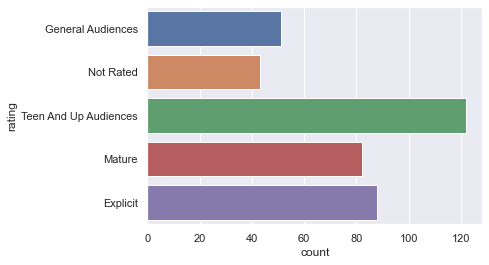

In [225]:
## EVERYTHING FOR RATING!
sns.set_theme(style="darkgrid")
titanic = sns.load_dataset("titanic")
ax = sns.countplot(y="rating", data=df)

In [124]:
## rows with multiple fandoms eliminate? 
sc = 0
mc = 0
list_drop = []
for i in range(len(df)):
    fandom_list = df['fandom'][i]
    fandom_list = fandom_list.split(",")
#     print(fandom_list)
    if len(fandom_list) == 1:
        if fandom_list[0] == 'Six of Crows Series - Leigh Bardugo':
            sc+=1
        elif fandom_list[0] == 'Sherlock (TV)' :
            sc+=1
        elif fandom_list[0] == 'James Bond (Craig Movies)' :
            sc+=1
        elif fandom_list[0] == 'Harry Potter - J. K. Rowling':
            sc+=1
        else:
            list_drop += [i]
    else:
        #drop the ones that are multifandom 
        list_drop += [i]
        mc+=1
print(list_drop)

print(f'{sc} that are only one fandom')
print(f'{mc} that are multifandom')    
    

[2, 3, 6, 7, 9, 10, 12, 13, 14, 16, 19, 22, 23, 24, 25, 26, 27, 28, 31, 32, 40, 44, 45, 46, 49, 50, 51, 53, 56, 57, 60, 61, 62, 63, 68, 73, 75, 76, 77, 86, 89, 90, 91, 92, 95, 96, 98, 99, 100, 104, 107, 109, 116, 118, 122, 124, 126, 127, 129, 132, 135, 137, 138, 140, 142, 143, 144, 148, 149, 150, 155, 157, 161, 167, 168, 170, 172, 173, 174, 181, 182, 183, 184, 194, 195, 201, 202, 212, 213, 217, 218, 219, 220, 224, 225, 226, 227, 228, 231, 233, 234, 235, 239, 240, 242, 250, 251, 254, 256, 265, 268, 270, 271, 273, 277, 279, 280, 281, 282, 283, 289, 291, 294, 300, 304, 311, 318, 323, 332, 334, 335, 338, 349, 352, 354, 356, 363, 370, 377, 383]
246 that are only one fandom
138 that are multifandom


In [125]:
##put only english stuff in the thing
list1 = []
for i in range(0, len(df)):
    if df['language'][i] != "English":
        if i not in list_drop:
            list1+=[i]
print(list1)
for value in list1:
    list_drop += [value]
    
print(list_drop)

[198, 205, 210, 215, 221, 229, 237, 238, 241, 243, 244, 245, 246, 247, 248, 253, 257, 262, 266, 274, 284, 351, 368, 374, 378, 382]
[2, 3, 6, 7, 9, 10, 12, 13, 14, 16, 19, 22, 23, 24, 25, 26, 27, 28, 31, 32, 40, 44, 45, 46, 49, 50, 51, 53, 56, 57, 60, 61, 62, 63, 68, 73, 75, 76, 77, 86, 89, 90, 91, 92, 95, 96, 98, 99, 100, 104, 107, 109, 116, 118, 122, 124, 126, 127, 129, 132, 135, 137, 138, 140, 142, 143, 144, 148, 149, 150, 155, 157, 161, 167, 168, 170, 172, 173, 174, 181, 182, 183, 184, 194, 195, 201, 202, 212, 213, 217, 218, 219, 220, 224, 225, 226, 227, 228, 231, 233, 234, 235, 239, 240, 242, 250, 251, 254, 256, 265, 268, 270, 271, 273, 277, 279, 280, 281, 282, 283, 289, 291, 294, 300, 304, 311, 318, 323, 332, 334, 335, 338, 349, 352, 354, 356, 363, 370, 377, 383, 198, 205, 210, 215, 221, 229, 237, 238, 241, 243, 244, 245, 246, 247, 248, 253, 257, 262, 266, 274, 284, 351, 368, 374, 378, 382]


In [16]:
print((df['fandom'][300]))

Harry Potter - J. K. Rowling, Twilight Series - Stephenie Meyer, Twilight Series - All Media Types


In [131]:
ROW = 0
COLUMN = 1

df_clean1 = df.drop(list_drop, axis=ROW)
df_clean1

,work_id,title,author,rating,category,fandom,relationship,character,additional tags,language,...,status date,words,chapters,comments,kudos,bookmarks,hits,all_kudos,all_bookmarks,body
0,38068225,A Hundred Theories,['genuineformality'],General Audiences,Gen,Six of Crows Series - Leigh Bardugo,Kaz Brekker/Inej Ghafa,"Kaz Brekker, Inej Ghafa","Pre-Canon, Developing Friendships, Kaz Brekker...",English,...,2022-03-31,2091,1/1,32.0,82.0,4.0,387,"['majeda', 'crackbaby13', 'Starryskyondragonsb...",[],"\n\nKaz hated a puzzle he couldn't solve, and ..."
1,38010298,i'll tell you all about it (when i see you again),['people_watching'],Not Rated,NaN,Six of Crows Series - Leigh Bardugo,"Matthias Helvar/Nina Zenik, Kaz Brekker/Inej G...","Matthias Helvar, Wylan Van Eck, Inej Ghafa, Ni...","Post-Book 2: Crooked Kingdom, Spoilers for Cro...",English,...,2022-03-31,2656,3/6,4.0,17.0,1.0,258,"['carry_on_simon', 'Elevatornotworthy_1', 'Oli...",[],Matthias can barely hear himself think with th...
4,38066179,save me from myself (don't let me down),['xxartistintrainingxx'],Teen And Up Audiences,M/M,Six of Crows Series - Leigh Bardugo,Jesper Fahey/Wylan Van Eck,"Wylan Van Eck, Jesper Fahey","Nightmares, Hurt/Comfort, Angst, Wylan Van Eck...",English,...,2022-03-30,2174,1/1,4.0,36.0,4.0,397,"['ThatOddNerd', 'bee_slut', 'Reader2005', 'Boo...",[],Wylan gasped and thrashed as he struggled to s...
5,37607470,"You fell from the tree again, didn't you?",['AlphaZeroAce'],Teen And Up Audiences,NaN,Six of Crows Series - Leigh Bardugo,"Kaz Brekker & Jesper Fahey, Kaz Brekker & Jord...","Kaz Brekker, Jordie Rietveld, Jesper Fahey","Past, Kaz Brekker & Jesper Fahey Friendship, Y...",English,...,2022-03-30,2989,4/?,NaN,18.0,2.0,477,"['Adore_reading', 'bookworm_krisi1', 'StarRose...",[],\n\nKaz was sitting under the tree in the back...
8,37590898,You knew them,['AlphaZeroAce'],General Audiences,NaN,Six of Crows Series - Leigh Bardugo,"Kaz Brekker & Jesper Fahey, Kaz Brekker & Jord...","Kaz Brekker, Kaz Brekker's Father, Kaz Brekker...","Character Death, Jordie Rietveld Lives, Big Br...",English,...,2022-03-30,5391,5/?,3.0,63.0,6.0,1029,"['FangirlFreak08', 'Catduck', 'dontloseyourhea...",[],\n\nWhy did I come here. Kaz thought as Colm w...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,38106952,The doe and the stag,['marlo_zart'],Teen And Up Audiences,F/M,Harry Potter - J. K. Rowling,James Potter/Lily Evans Potter,"James Potter, Lily Evans Potter, Minerva McGon...","Hurt/Comfort, Fluff, Marriage Proposal",English,...,2022-04-01,1600,1/?,NaN,3.0,NaN,49,[],[],James finds Lily after a distressing letter fr...
380,38096989,Payback is a real bitch,['x_manga_Bleach_x'],Explicit,M/M,Harry Potter - J. K. Rowling,"Draco Malfoy/Lucius Malfoy, Harry Potter & Fre...","Harry Potter, Fred Weasley, George Weasley, Lu...","Revenge, Public Humiliation, Insane Harry Pott...",English,...,2022-04-01,2335,1/1,1.0,36.0,7.0,512,"['Junebug_27', 'FuzzPuzzBuzz', 'shiggyonthebea...",[],Harry huffed when he saw the headlines of the ...
381,38106892,All Mine (and His),['maraudersaffair'],Explicit,F/M,Harry Potter - J. K. Rowling,"Hermione Granger/Draco Malfoy, Hermione Grange...","Hermione Granger, Draco Malfoy, Charlie Weasley","Threesome - F/M/M, Polyamory, Getting Together...",English,...,2022-04-01,5019,1/1,2.0,73.0,9.0,1916,"['Cookiemom14', 'JamesLethe', 'Trichardson', '...",[],Hermione wanted a baby. She wanted to be a mot...
384,31236521,In the Shadows (Wizarding War),['CL_Avery'],Mature,"F/M, Multi",Harry Potter - J. K. Rowling,"Sirius Black/Original Female Character(s), Jam...","Original Characters, Sirius Black, James Potte...","Wizarding Wars (Harry Potter), Order of the Ph...",English,...,2022-04-01,134525,24/?,36.0,50.0,15.0,1941,"['LaInternettuale', 'Darie1_6', 'Lady_Murphyy'...",[],\n\n\n\n\n\nClaudia opened her eyes and glance...


In [132]:


df_clean2 = df_clean1
df_clean2 = df_clean2.drop(list1, axis=ROW)

KeyError: '[198 205 210 215 221 229 237 238 241 243 244 245 246 247 248 253 257 262\n 266 274 284 351 368 374 378 382] not found in axis'

In [127]:
df_clean2

,work_id,title,author,rating,category,fandom,relationship,character,additional tags,language,...,status date,words,chapters,comments,kudos,bookmarks,hits,all_kudos,all_bookmarks,body
0,38068225,A Hundred Theories,['genuineformality'],General Audiences,Gen,Six of Crows Series - Leigh Bardugo,Kaz Brekker/Inej Ghafa,"Kaz Brekker, Inej Ghafa","Pre-Canon, Developing Friendships, Kaz Brekker...",English,...,2022-03-31,2091,1/1,32.0,82.0,4.0,387,"['majeda', 'crackbaby13', 'Starryskyondragonsb...",[],"\n\nKaz hated a puzzle he couldn't solve, and ..."
1,38010298,i'll tell you all about it (when i see you again),['people_watching'],Not Rated,NaN,Six of Crows Series - Leigh Bardugo,"Matthias Helvar/Nina Zenik, Kaz Brekker/Inej G...","Matthias Helvar, Wylan Van Eck, Inej Ghafa, Ni...","Post-Book 2: Crooked Kingdom, Spoilers for Cro...",English,...,2022-03-31,2656,3/6,4.0,17.0,1.0,258,"['carry_on_simon', 'Elevatornotworthy_1', 'Oli...",[],Matthias can barely hear himself think with th...
4,38066179,save me from myself (don't let me down),['xxartistintrainingxx'],Teen And Up Audiences,M/M,Six of Crows Series - Leigh Bardugo,Jesper Fahey/Wylan Van Eck,"Wylan Van Eck, Jesper Fahey","Nightmares, Hurt/Comfort, Angst, Wylan Van Eck...",English,...,2022-03-30,2174,1/1,4.0,36.0,4.0,397,"['ThatOddNerd', 'bee_slut', 'Reader2005', 'Boo...",[],Wylan gasped and thrashed as he struggled to s...
5,37607470,"You fell from the tree again, didn't you?",['AlphaZeroAce'],Teen And Up Audiences,NaN,Six of Crows Series - Leigh Bardugo,"Kaz Brekker & Jesper Fahey, Kaz Brekker & Jord...","Kaz Brekker, Jordie Rietveld, Jesper Fahey","Past, Kaz Brekker & Jesper Fahey Friendship, Y...",English,...,2022-03-30,2989,4/?,NaN,18.0,2.0,477,"['Adore_reading', 'bookworm_krisi1', 'StarRose...",[],\n\nKaz was sitting under the tree in the back...
8,37590898,You knew them,['AlphaZeroAce'],General Audiences,NaN,Six of Crows Series - Leigh Bardugo,"Kaz Brekker & Jesper Fahey, Kaz Brekker & Jord...","Kaz Brekker, Kaz Brekker's Father, Kaz Brekker...","Character Death, Jordie Rietveld Lives, Big Br...",English,...,2022-03-30,5391,5/?,3.0,63.0,6.0,1029,"['FangirlFreak08', 'Catduck', 'dontloseyourhea...",[],\n\nWhy did I come here. Kaz thought as Colm w...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,38106952,The doe and the stag,['marlo_zart'],Teen And Up Audiences,F/M,Harry Potter - J. K. Rowling,James Potter/Lily Evans Potter,"James Potter, Lily Evans Potter, Minerva McGon...","Hurt/Comfort, Fluff, Marriage Proposal",English,...,2022-04-01,1600,1/?,NaN,3.0,NaN,49,[],[],James finds Lily after a distressing letter fr...
380,38096989,Payback is a real bitch,['x_manga_Bleach_x'],Explicit,M/M,Harry Potter - J. K. Rowling,"Draco Malfoy/Lucius Malfoy, Harry Potter & Fre...","Harry Potter, Fred Weasley, George Weasley, Lu...","Revenge, Public Humiliation, Insane Harry Pott...",English,...,2022-04-01,2335,1/1,1.0,36.0,7.0,512,"['Junebug_27', 'FuzzPuzzBuzz', 'shiggyonthebea...",[],Harry huffed when he saw the headlines of the ...
381,38106892,All Mine (and His),['maraudersaffair'],Explicit,F/M,Harry Potter - J. K. Rowling,"Hermione Granger/Draco Malfoy, Hermione Grange...","Hermione Granger, Draco Malfoy, Charlie Weasley","Threesome - F/M/M, Polyamory, Getting Together...",English,...,2022-04-01,5019,1/1,2.0,73.0,9.0,1916,"['Cookiemom14', 'JamesLethe', 'Trichardson', '...",[],Hermione wanted a baby. She wanted to be a mot...
384,31236521,In the Shadows (Wizarding War),['CL_Avery'],Mature,"F/M, Multi",Harry Potter - J. K. Rowling,"Sirius Black/Original Female Character(s), Jam...","Original Characters, Sirius Black, James Potte...","Wizarding Wars (Harry Potter), Order of the Ph...",English,...,2022-04-01,134525,24/?,36.0,50.0,15.0,1941,"['LaInternettuale', 'Darie1_6', 'Lady_Murphyy'...",[],\n\n\n\n\n\nClaudia opened her eyes and glance...


In [137]:
# check for english!!!

for i in range(0,len(df_clean2)):
    if i not in list1 and i not in list_drop:
        if df_clean2["language"][i] != "English":
            print(i)

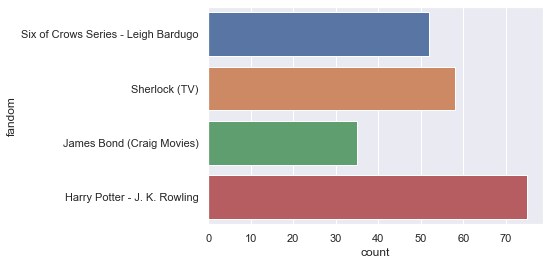

In [128]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(y="fandom", data=df_clean2)

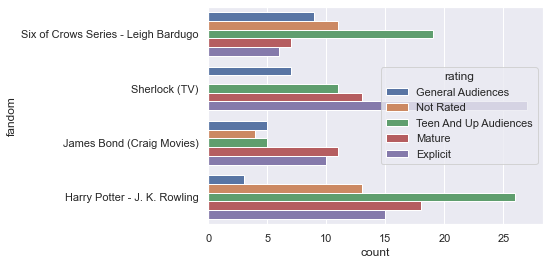

In [129]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(y="fandom", hue ="rating", data=df_clean2)

In [138]:
df_clean3 = df_clean2.drop(['language', 'published', 'all_kudos', 'all_bookmarks', 'bookmarks', 'comments', 'words', 'status', 'status date'], axis=COLUMN)
df_clean3 

,work_id,title,author,rating,category,fandom,relationship,character,additional tags,chapters,kudos,hits,body
0,38068225,A Hundred Theories,['genuineformality'],General Audiences,Gen,Six of Crows Series - Leigh Bardugo,Kaz Brekker/Inej Ghafa,"Kaz Brekker, Inej Ghafa","Pre-Canon, Developing Friendships, Kaz Brekker...",1/1,82.0,387,"\n\nKaz hated a puzzle he couldn't solve, and ..."
1,38010298,i'll tell you all about it (when i see you again),['people_watching'],Not Rated,NaN,Six of Crows Series - Leigh Bardugo,"Matthias Helvar/Nina Zenik, Kaz Brekker/Inej G...","Matthias Helvar, Wylan Van Eck, Inej Ghafa, Ni...","Post-Book 2: Crooked Kingdom, Spoilers for Cro...",3/6,17.0,258,Matthias can barely hear himself think with th...
4,38066179,save me from myself (don't let me down),['xxartistintrainingxx'],Teen And Up Audiences,M/M,Six of Crows Series - Leigh Bardugo,Jesper Fahey/Wylan Van Eck,"Wylan Van Eck, Jesper Fahey","Nightmares, Hurt/Comfort, Angst, Wylan Van Eck...",1/1,36.0,397,Wylan gasped and thrashed as he struggled to s...
5,37607470,"You fell from the tree again, didn't you?",['AlphaZeroAce'],Teen And Up Audiences,NaN,Six of Crows Series - Leigh Bardugo,"Kaz Brekker & Jesper Fahey, Kaz Brekker & Jord...","Kaz Brekker, Jordie Rietveld, Jesper Fahey","Past, Kaz Brekker & Jesper Fahey Friendship, Y...",4/?,18.0,477,\n\nKaz was sitting under the tree in the back...
8,37590898,You knew them,['AlphaZeroAce'],General Audiences,NaN,Six of Crows Series - Leigh Bardugo,"Kaz Brekker & Jesper Fahey, Kaz Brekker & Jord...","Kaz Brekker, Kaz Brekker's Father, Kaz Brekker...","Character Death, Jordie Rietveld Lives, Big Br...",5/?,63.0,1029,\n\nWhy did I come here. Kaz thought as Colm w...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,38106952,The doe and the stag,['marlo_zart'],Teen And Up Audiences,F/M,Harry Potter - J. K. Rowling,James Potter/Lily Evans Potter,"James Potter, Lily Evans Potter, Minerva McGon...","Hurt/Comfort, Fluff, Marriage Proposal",1/?,3.0,49,James finds Lily after a distressing letter fr...
380,38096989,Payback is a real bitch,['x_manga_Bleach_x'],Explicit,M/M,Harry Potter - J. K. Rowling,"Draco Malfoy/Lucius Malfoy, Harry Potter & Fre...","Harry Potter, Fred Weasley, George Weasley, Lu...","Revenge, Public Humiliation, Insane Harry Pott...",1/1,36.0,512,Harry huffed when he saw the headlines of the ...
381,38106892,All Mine (and His),['maraudersaffair'],Explicit,F/M,Harry Potter - J. K. Rowling,"Hermione Granger/Draco Malfoy, Hermione Grange...","Hermione Granger, Draco Malfoy, Charlie Weasley","Threesome - F/M/M, Polyamory, Getting Together...",1/1,73.0,1916,Hermione wanted a baby. She wanted to be a mot...
384,31236521,In the Shadows (Wizarding War),['CL_Avery'],Mature,"F/M, Multi",Harry Potter - J. K. Rowling,"Sirius Black/Original Female Character(s), Jam...","Original Characters, Sirius Black, James Potte...","Wizarding Wars (Harry Potter), Order of the Ph...",24/?,50.0,1941,\n\n\n\n\n\nClaudia opened her eyes and glance...


In [139]:
## drop the other stuff
df_clean4 = df_clean3.drop("author", axis = COLUMN)
df_clean4

,work_id,title,rating,category,fandom,relationship,character,additional tags,chapters,kudos,hits,body
0,38068225,A Hundred Theories,General Audiences,Gen,Six of Crows Series - Leigh Bardugo,Kaz Brekker/Inej Ghafa,"Kaz Brekker, Inej Ghafa","Pre-Canon, Developing Friendships, Kaz Brekker...",1/1,82.0,387,"\n\nKaz hated a puzzle he couldn't solve, and ..."
1,38010298,i'll tell you all about it (when i see you again),Not Rated,NaN,Six of Crows Series - Leigh Bardugo,"Matthias Helvar/Nina Zenik, Kaz Brekker/Inej G...","Matthias Helvar, Wylan Van Eck, Inej Ghafa, Ni...","Post-Book 2: Crooked Kingdom, Spoilers for Cro...",3/6,17.0,258,Matthias can barely hear himself think with th...
4,38066179,save me from myself (don't let me down),Teen And Up Audiences,M/M,Six of Crows Series - Leigh Bardugo,Jesper Fahey/Wylan Van Eck,"Wylan Van Eck, Jesper Fahey","Nightmares, Hurt/Comfort, Angst, Wylan Van Eck...",1/1,36.0,397,Wylan gasped and thrashed as he struggled to s...
5,37607470,"You fell from the tree again, didn't you?",Teen And Up Audiences,NaN,Six of Crows Series - Leigh Bardugo,"Kaz Brekker & Jesper Fahey, Kaz Brekker & Jord...","Kaz Brekker, Jordie Rietveld, Jesper Fahey","Past, Kaz Brekker & Jesper Fahey Friendship, Y...",4/?,18.0,477,\n\nKaz was sitting under the tree in the back...
8,37590898,You knew them,General Audiences,NaN,Six of Crows Series - Leigh Bardugo,"Kaz Brekker & Jesper Fahey, Kaz Brekker & Jord...","Kaz Brekker, Kaz Brekker's Father, Kaz Brekker...","Character Death, Jordie Rietveld Lives, Big Br...",5/?,63.0,1029,\n\nWhy did I come here. Kaz thought as Colm w...
...,...,...,...,...,...,...,...,...,...,...,...,...
379,38106952,The doe and the stag,Teen And Up Audiences,F/M,Harry Potter - J. K. Rowling,James Potter/Lily Evans Potter,"James Potter, Lily Evans Potter, Minerva McGon...","Hurt/Comfort, Fluff, Marriage Proposal",1/?,3.0,49,James finds Lily after a distressing letter fr...
380,38096989,Payback is a real bitch,Explicit,M/M,Harry Potter - J. K. Rowling,"Draco Malfoy/Lucius Malfoy, Harry Potter & Fre...","Harry Potter, Fred Weasley, George Weasley, Lu...","Revenge, Public Humiliation, Insane Harry Pott...",1/1,36.0,512,Harry huffed when he saw the headlines of the ...
381,38106892,All Mine (and His),Explicit,F/M,Harry Potter - J. K. Rowling,"Hermione Granger/Draco Malfoy, Hermione Grange...","Hermione Granger, Draco Malfoy, Charlie Weasley","Threesome - F/M/M, Polyamory, Getting Together...",1/1,73.0,1916,Hermione wanted a baby. She wanted to be a mot...
384,31236521,In the Shadows (Wizarding War),Mature,"F/M, Multi",Harry Potter - J. K. Rowling,"Sirius Black/Original Female Character(s), Jam...","Original Characters, Sirius Black, James Potte...","Wizarding Wars (Harry Potter), Order of the Ph...",24/?,50.0,1941,\n\n\n\n\n\nClaudia opened her eyes and glance...


In [142]:
df_clean5 = df_clean4.drop(["work_id","category","chapters", "kudos", "hits"], axis = COLUMN)
df_clean5

,title,rating,fandom,relationship,character,additional tags,body
0,A Hundred Theories,General Audiences,Six of Crows Series - Leigh Bardugo,Kaz Brekker/Inej Ghafa,"Kaz Brekker, Inej Ghafa","Pre-Canon, Developing Friendships, Kaz Brekker...","\n\nKaz hated a puzzle he couldn't solve, and ..."
1,i'll tell you all about it (when i see you again),Not Rated,Six of Crows Series - Leigh Bardugo,"Matthias Helvar/Nina Zenik, Kaz Brekker/Inej G...","Matthias Helvar, Wylan Van Eck, Inej Ghafa, Ni...","Post-Book 2: Crooked Kingdom, Spoilers for Cro...",Matthias can barely hear himself think with th...
4,save me from myself (don't let me down),Teen And Up Audiences,Six of Crows Series - Leigh Bardugo,Jesper Fahey/Wylan Van Eck,"Wylan Van Eck, Jesper Fahey","Nightmares, Hurt/Comfort, Angst, Wylan Van Eck...",Wylan gasped and thrashed as he struggled to s...
5,"You fell from the tree again, didn't you?",Teen And Up Audiences,Six of Crows Series - Leigh Bardugo,"Kaz Brekker & Jesper Fahey, Kaz Brekker & Jord...","Kaz Brekker, Jordie Rietveld, Jesper Fahey","Past, Kaz Brekker & Jesper Fahey Friendship, Y...",\n\nKaz was sitting under the tree in the back...
8,You knew them,General Audiences,Six of Crows Series - Leigh Bardugo,"Kaz Brekker & Jesper Fahey, Kaz Brekker & Jord...","Kaz Brekker, Kaz Brekker's Father, Kaz Brekker...","Character Death, Jordie Rietveld Lives, Big Br...",\n\nWhy did I come here. Kaz thought as Colm w...
...,...,...,...,...,...,...,...
379,The doe and the stag,Teen And Up Audiences,Harry Potter - J. K. Rowling,James Potter/Lily Evans Potter,"James Potter, Lily Evans Potter, Minerva McGon...","Hurt/Comfort, Fluff, Marriage Proposal",James finds Lily after a distressing letter fr...
380,Payback is a real bitch,Explicit,Harry Potter - J. K. Rowling,"Draco Malfoy/Lucius Malfoy, Harry Potter & Fre...","Harry Potter, Fred Weasley, George Weasley, Lu...","Revenge, Public Humiliation, Insane Harry Pott...",Harry huffed when he saw the headlines of the ...
381,All Mine (and His),Explicit,Harry Potter - J. K. Rowling,"Hermione Granger/Draco Malfoy, Hermione Grange...","Hermione Granger, Draco Malfoy, Charlie Weasley","Threesome - F/M/M, Polyamory, Getting Together...",Hermione wanted a baby. She wanted to be a mot...
384,In the Shadows (Wizarding War),Mature,Harry Potter - J. K. Rowling,"Sirius Black/Original Female Character(s), Jam...","Original Characters, Sirius Black, James Potte...","Wizarding Wars (Harry Potter), Order of the Ph...",\n\n\n\n\n\nClaudia opened her eyes and glance...


## try to clean the data for categorizing the fandoms
The following code is mostly copy pasted from this github repository
https://github.com/miguelfzafra/Latest-News-Classifier/blob/master/0.%20Latest%20News%20Classifier/03.%20Feature%20Engineering/03.%20Feature%20Engineering.ipynb

In [143]:

import pickle
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
import numpy as np

In [144]:
df_clean5.loc[1]['body']

'Matthias can barely hear himself think with the blood pounding in his ears. He\'d seen the anger in the young boy\'s eyes, had seen the gun, but somehow, hadn\'t expected to be shot.\n\t\n\nHe needs to get to Nina.\n\t\n\nAs he tries to navigate the streets of Ketterdam with a bullet wound, he remembers one of the conversations he\'d first had with... well. His friends.\n\t\n\nWeeks ago, when they were working on the Ice Court mission. Jesper had made a comment about if they died, that he was going to make Wylan\'s ghost teach him to play the flute so he could annoy Kaz for eternity.\n\t\n\nKaz had said he\'d just hire Matthias\'s ghost to kick Jesper\'s ghost\'s ass. \n\t\n\nMatthias had said his ghost wouldn\'t associate with Kaz\'s. \n\t\n\nHe\'d felt so strange, making a joking comment with these people, people he thought were the worst kind of people. He\'d felt like an idiot even saying anything in response.\n\t\n\nMatthias looks back at the Ice Court mission with a weird combin

1. Text cleaning and preparation
1.1. Special character cleaning
We can see the following special characters:

\r
\n
\ before possessive pronouns (government's = government\'s)
\ before possessive pronouns 2 (Yukos' = Yukos\')
" when quoting text

In [145]:
# \r and \n
df_clean5['Body_Parsed_1'] = df_clean5['body'].str.replace("\r", " ")
df_clean5['Body_Parsed_1'] = df_clean5['Body_Parsed_1'].str.replace("\n", " ")
df_clean5['Body_Parsed_1'] = df_clean5['Body_Parsed_1'].str.replace("    ", " ")
df_clean5['Body_Parsed_1'] = df_clean5['Body_Parsed_1'].str.replace("\t", " ")

In [146]:
# Regarding 3rd and 4th bullet, although it seems there is a special character, it won't affect us since it is not a real character:
text = "Mr Greenspan\'s"
text

"Mr Greenspan's"

In [147]:
# " when quoting text
df_clean5['Body_Parsed_1'] = df_clean5['Body_Parsed_1'].str.replace('"', '')

1.2. Upcase/downcase
We'll downcase the texts because we want, for example, Football and football to be the same word.

In [148]:
# Lowercasing the text
df_clean5['Body_Parsed_2'] = df_clean5['Body_Parsed_1'].str.lower()

1.3. Punctuation signs
Punctuation signs won't have any predicting power, so we'll just get rid of them.

In [149]:
punctuation_signs = list("?:!.,;")
df_clean5['Body_Parsed_3'] = df_clean5['Body_Parsed_2']

for punct_sign in punctuation_signs:
    df_clean5['Body_Parsed_3'] = df_clean5['Body_Parsed_3'].str.replace(punct_sign, '')

1.4. Possessive pronouns
We'll also remove possessive pronoun terminations:

In [150]:
 df_clean5['Body_Parsed_4'] =  df_clean5['Body_Parsed_3'].str.replace("'s", "")

1.5. Stemming and Lemmatization
Since stemming can produce output words that don't exist, we'll only use a lemmatization process at this moment. Lemmatization takes into consideration the morphological analysis of the words and returns words that do exist, so it will be more useful for us.


In [151]:
# is the process of grouping together the inflected forms of a word 
#so they can be analysed as a single item, identified by the word's 
#lemma, or dictionary form

In [152]:
# Downloading punkt and wordnet from NLTK
nltk.download('punkt')
print("------------------------------------------------------------")
nltk.download('wordnet')

------------------------------------------------------------


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/waverlywang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/waverlywang/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [153]:
# Saving the lemmatizer into an object
wordnet_lemmatizer = WordNetLemmatizer()

In [154]:
nrows = len(df)
lemmatized_text_list = []

for row in range(0, nrows):
    if row not in list_drop:
        # Create an empty list containing lemmatized words
        lemmatized_list = []

        # Save the text and its words into an object
        text = df_clean5.loc[row]['Body_Parsed_4']
        text_words = text.split(" ")

        # Iterate through every word to lemmatize
        for word in text_words:
            lemmatized_list.append(wordnet_lemmatizer.lemmatize(word, pos="v"))

        # Join the list
        lemmatized_text = " ".join(lemmatized_list)

        # Append to the list containing the texts
        lemmatized_text_list.append(lemmatized_text)

In [155]:
df_clean5['Body_Parsed_5'] = lemmatized_text_list

In [156]:
# Downloading the stop words list
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/waverlywang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [157]:
# Loading the stop words in english
stop_words = list(stopwords.words('english'))

In [158]:
stop_words[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [159]:
example = "me eating a meal"
word = "me"

# The regular expression is:
regex = r"\b" + word + r"\b"  # we need to build it like that to work properly

re.sub(regex, "StopWord", example)

'StopWord eating a meal'

In [160]:
df_clean5['Body_Parsed_6'] = df_clean5['Body_Parsed_5']

for stop_word in stop_words:

    regex_stopword = r"\b" + stop_word + r"\b"
    df_clean5['Body_Parsed_6'] = df_clean5['Body_Parsed_6'].str.replace(regex_stopword, '')

In [161]:
df_clean5.loc[5]['body']

'\n\nKaz was sitting under the tree in the backyard when Jordie and Jesper came running over. Jesper was staying for the weekend and their Da was busy, meaning Jordie was in charge. Normally taking care of Kaz was easy, but he and Jesper seemed to always see everything as a challenge, which is probably why, Jordie assumed, Kaz was injured.\n\n"Hi Jordie." Kaz said waving at him.\n\n"No, not \'Hi Jordie\' your injured. You climbed the tree again, didn\'t you?" Jordie asked and shook his head.\n\n"Yeah, but I didn\'t know the branch would break." Kaz said as Jordie inspected him for anything major.\n\n"Well, your legs and left arm are fine."\n\n"My left arm? What about-"\n\n"Your wrist is broken on the right."\n\nKaz\'s eyes grew wide and Jordie realized his mistake. Kaz was only seven and the idea of a broken bone seemed terrifying.\n\n"Hey, but it\'s alright. I will get a doctor from town and Jesper will help you have lunch."\n\nJesper chimed in now. "I will?"\n\n"Yes, you will." Jordi

In [46]:
df_clean5.loc[5]['Body_Parsed_1']

"  Kaz was sitting under the tree in the backyard when Jordie and Jesper came running over. Jesper was staying for the weekend and their Da was busy, meaning Jordie was in charge. Normally taking care of Kaz was easy, but he and Jesper seemed to always see everything as a challenge, which is probably why, Jordie assumed, Kaz was injured.  Hi Jordie. Kaz said waving at him.  No, not 'Hi Jordie' your injured. You climbed the tree again, didn't you? Jordie asked and shook his head.  Yeah, but I didn't know the branch would break. Kaz said as Jordie inspected him for anything major.  Well, your legs and left arm are fine.  My left arm? What about-  Your wrist is broken on the right.  Kaz's eyes grew wide and Jordie realized his mistake. Kaz was only seven and the idea of a broken bone seemed terrifying.  Hey, but it's alright. I will get a doctor from town and Jesper will help you have lunch.  Jesper chimed in now. I will?  Yes, you will. Jordie said through gritted teeth and Jesper nodded

In [47]:
df_clean5.loc[5]['Body_Parsed_2']

"  kaz was sitting under the tree in the backyard when jordie and jesper came running over. jesper was staying for the weekend and their da was busy, meaning jordie was in charge. normally taking care of kaz was easy, but he and jesper seemed to always see everything as a challenge, which is probably why, jordie assumed, kaz was injured.  hi jordie. kaz said waving at him.  no, not 'hi jordie' your injured. you climbed the tree again, didn't you? jordie asked and shook his head.  yeah, but i didn't know the branch would break. kaz said as jordie inspected him for anything major.  well, your legs and left arm are fine.  my left arm? what about-  your wrist is broken on the right.  kaz's eyes grew wide and jordie realized his mistake. kaz was only seven and the idea of a broken bone seemed terrifying.  hey, but it's alright. i will get a doctor from town and jesper will help you have lunch.  jesper chimed in now. i will?  yes, you will. jordie said through gritted teeth and jesper nodded

In [48]:
df_clean5.loc[5]['Body_Parsed_3']

"  kaz was sitting under the tree in the backyard when jordie and jesper came running over jesper was staying for the weekend and their da was busy meaning jordie was in charge normally taking care of kaz was easy but he and jesper seemed to always see everything as a challenge which is probably why jordie assumed kaz was injured  hi jordie kaz said waving at him  no not 'hi jordie' your injured you climbed the tree again didn't you jordie asked and shook his head  yeah but i didn't know the branch would break kaz said as jordie inspected him for anything major  well your legs and left arm are fine  my left arm what about-  your wrist is broken on the right  kaz's eyes grew wide and jordie realized his mistake kaz was only seven and the idea of a broken bone seemed terrifying  hey but it's alright i will get a doctor from town and jesper will help you have lunch  jesper chimed in now i will  yes you will jordie said through gritted teeth and jesper nodded in agreement afraid of what mi

In [49]:
df_clean5.loc[5]['Body_Parsed_4']

"  kaz was sitting under the tree in the backyard when jordie and jesper came running over jesper was staying for the weekend and their da was busy meaning jordie was in charge normally taking care of kaz was easy but he and jesper seemed to always see everything as a challenge which is probably why jordie assumed kaz was injured  hi jordie kaz said waving at him  no not 'hi jordie' your injured you climbed the tree again didn't you jordie asked and shook his head  yeah but i didn't know the branch would break kaz said as jordie inspected him for anything major  well your legs and left arm are fine  my left arm what about-  your wrist is broken on the right  kaz eyes grew wide and jordie realized his mistake kaz was only seven and the idea of a broken bone seemed terrifying  hey but it alright i will get a doctor from town and jesper will help you have lunch  jesper chimed in now i will  yes you will jordie said through gritted teeth and jesper nodded in agreement afraid of what might 

In [50]:
df_clean5.loc[5]['Body_Parsed_5']

"  kaz be sit under the tree in the backyard when jordie and jesper come run over jesper be stay for the weekend and their da be busy mean jordie be in charge normally take care of kaz be easy but he and jesper seem to always see everything as a challenge which be probably why jordie assume kaz be injure  hi jordie kaz say wave at him  no not 'hi jordie' your injure you climb the tree again didn't you jordie ask and shake his head  yeah but i didn't know the branch would break kaz say as jordie inspect him for anything major  well your legs and leave arm be fine  my leave arm what about-  your wrist be break on the right  kaz eye grow wide and jordie realize his mistake kaz be only seven and the idea of a break bone seem terrify  hey but it alright i will get a doctor from town and jesper will help you have lunch  jesper chime in now i will  yes you will jordie say through grit teeth and jesper nod in agreement afraid of what might happen if he refuse  after he make sure jesper and kaz

In [162]:
df_clean5.loc[5]['Body_Parsed_6']

"  kaz  sit   tree   backyard  jordie  jesper come run  jesper  stay   weekend   da  busy mean jordie   charge normally take care  kaz  easy    jesper seem  always see everything   challenge   probably  jordie assume kaz  injure  hi jordie kaz say wave      'hi jordie'  injure  climb  tree  '  jordie ask  shake  head  yeah   ' know  branch would break kaz say  jordie inspect   anything major  well  legs  leave arm  fine   leave arm  -   wrist  break   right  kaz eye grow wide  jordie realize  mistake kaz   seven   idea   break bone seem terrify  hey   alright   get  doctor  town  jesper  help   lunch  jesper chime      yes   jordie say  grit teeth  jesper nod  agreement afraid   might happen   refuse    make sure jesper  kaz  inside   kaz    position   could eat without hurt  wrist  go  town  ride ' take long  horse   find  doctor  something     journey  tell     paranoid   lead  doctor towards home  look   mountains   road watch   cloud pass    cloud ' move  mountains     see   ask  d

In [163]:
df_clean5['Body_Parsed_7'] = df_clean5['Body_Parsed_6'].str.replace("'", "")

In [164]:
df_clean5.loc[5]['Body_Parsed_7']

'  kaz  sit   tree   backyard  jordie  jesper come run  jesper  stay   weekend   da  busy mean jordie   charge normally take care  kaz  easy    jesper seem  always see everything   challenge   probably  jordie assume kaz  injure  hi jordie kaz say wave      hi jordie  injure  climb  tree    jordie ask  shake  head  yeah    know  branch would break kaz say  jordie inspect   anything major  well  legs  leave arm  fine   leave arm  -   wrist  break   right  kaz eye grow wide  jordie realize  mistake kaz   seven   idea   break bone seem terrify  hey   alright   get  doctor  town  jesper  help   lunch  jesper chime      yes   jordie say  grit teeth  jesper nod  agreement afraid   might happen   refuse    make sure jesper  kaz  inside   kaz    position   could eat without hurt  wrist  go  town  ride  take long  horse   find  doctor  something     journey  tell     paranoid   lead  doctor towards home  look   mountains   road watch   cloud pass    cloud  move  mountains     see   ask  disbeli

In [54]:
df_clean5.head(1)

,title,rating,fandom,relationship,character,additional tags,body,Body_Parsed_1,Body_Parsed_2,Body_Parsed_3,Body_Parsed_4,Body_Parsed_5,Body_Parsed_6,Body_Parsed_7
0,A Hundred Theories,General Audiences,Six of Crows Series - Leigh Bardugo,Kaz Brekker/Inej Ghafa,"Kaz Brekker, Inej Ghafa","Pre-Canon, Developing Friendships, Kaz Brekker...","\n\nKaz hated a puzzle he couldn't solve, and ...","Kaz hated a puzzle he couldn't solve, and he...","kaz hated a puzzle he couldn't solve, and he...",kaz hated a puzzle he couldn't solve and he ...,kaz hated a puzzle he couldn't solve and he ...,kaz hat a puzzle he couldn't solve and he an...,kaz hat puzzle ' solve inej concoct h...,kaz hat puzzle solve inej concoct hu...


In [165]:
list_columns = ["title", "rating", "fandom", "character", "additional tags", "body", "Body_Parsed_6", "Body_Parsed_7"]
df_clean5 = df_clean5[list_columns]

df_clean5 = df_clean5.rename(columns={'Body_Parsed_7': 'Body_Parsed'}) 

In [166]:
df_clean5

,title,rating,fandom,character,additional tags,body,Body_Parsed_6,Body_Parsed
0,A Hundred Theories,General Audiences,Six of Crows Series - Leigh Bardugo,"Kaz Brekker, Inej Ghafa","Pre-Canon, Developing Friendships, Kaz Brekker...","\n\nKaz hated a puzzle he couldn't solve, and ...",kaz hat puzzle ' solve inej concoct h...,kaz hat puzzle solve inej concoct hu...
1,i'll tell you all about it (when i see you again),Not Rated,Six of Crows Series - Leigh Bardugo,"Matthias Helvar, Wylan Van Eck, Inej Ghafa, Ni...","Post-Book 2: Crooked Kingdom, Spoilers for Cro...",Matthias can barely hear himself think with th...,matthias barely hear think blood pound e...,matthias barely hear think blood pound e...
4,save me from myself (don't let me down),Teen And Up Audiences,Six of Crows Series - Leigh Bardugo,"Wylan Van Eck, Jesper Fahey","Nightmares, Hurt/Comfort, Angst, Wylan Van Eck...",Wylan gasped and thrashed as he struggled to s...,wylan gasp thrash struggle swim shore wav...,wylan gasp thrash struggle swim shore wav...
5,"You fell from the tree again, didn't you?",Teen And Up Audiences,Six of Crows Series - Leigh Bardugo,"Kaz Brekker, Jordie Rietveld, Jesper Fahey","Past, Kaz Brekker & Jesper Fahey Friendship, Y...",\n\nKaz was sitting under the tree in the back...,kaz sit tree backyard jordie jesper c...,kaz sit tree backyard jordie jesper c...
8,You knew them,General Audiences,Six of Crows Series - Leigh Bardugo,"Kaz Brekker, Kaz Brekker's Father, Kaz Brekker...","Character Death, Jordie Rietveld Lives, Big Br...",\n\nWhy did I come here. Kaz thought as Colm w...,come kaz think colm go issadora dece...,come kaz think colm go issadora dece...
...,...,...,...,...,...,...,...,...
379,The doe and the stag,Teen And Up Audiences,Harry Potter - J. K. Rowling,"James Potter, Lily Evans Potter, Minerva McGon...","Hurt/Comfort, Fluff, Marriage Proposal",James finds Lily after a distressing letter fr...,jam find lily distress letter sister offe...,jam find lily distress letter sister offe...
380,Payback is a real bitch,Explicit,Harry Potter - J. K. Rowling,"Harry Potter, Fred Weasley, George Weasley, Lu...","Revenge, Public Humiliation, Insane Harry Pott...",Harry huffed when he saw the headlines of the ...,harry huff saw headline daily prophetyet ...,harry huff saw headline daily prophetyet ...
381,All Mine (and His),Explicit,Harry Potter - J. K. Rowling,"Hermione Granger, Draco Malfoy, Charlie Weasley","Threesome - F/M/M, Polyamory, Getting Together...",Hermione wanted a baby. She wanted to be a mot...,hermione want baby want mother also sin...,hermione want baby want mother also sin...
384,In the Shadows (Wizarding War),Mature,Harry Potter - J. K. Rowling,"Original Characters, Sirius Black, James Potte...","Wizarding Wars (Harry Potter), Order of the Ph...",\n\n\n\n\n\nClaudia opened her eyes and glance...,claudia open eye glance little alarm cl...,claudia open eye glance little alarm cl...


In [167]:
df_clean5['Body_Parsed'] = df_clean5['Body_Parsed'].str.replace("'", "")
df_clean5

,title,rating,fandom,character,additional tags,body,Body_Parsed_6,Body_Parsed
0,A Hundred Theories,General Audiences,Six of Crows Series - Leigh Bardugo,"Kaz Brekker, Inej Ghafa","Pre-Canon, Developing Friendships, Kaz Brekker...","\n\nKaz hated a puzzle he couldn't solve, and ...",kaz hat puzzle ' solve inej concoct h...,kaz hat puzzle solve inej concoct hu...
1,i'll tell you all about it (when i see you again),Not Rated,Six of Crows Series - Leigh Bardugo,"Matthias Helvar, Wylan Van Eck, Inej Ghafa, Ni...","Post-Book 2: Crooked Kingdom, Spoilers for Cro...",Matthias can barely hear himself think with th...,matthias barely hear think blood pound e...,matthias barely hear think blood pound e...
4,save me from myself (don't let me down),Teen And Up Audiences,Six of Crows Series - Leigh Bardugo,"Wylan Van Eck, Jesper Fahey","Nightmares, Hurt/Comfort, Angst, Wylan Van Eck...",Wylan gasped and thrashed as he struggled to s...,wylan gasp thrash struggle swim shore wav...,wylan gasp thrash struggle swim shore wav...
5,"You fell from the tree again, didn't you?",Teen And Up Audiences,Six of Crows Series - Leigh Bardugo,"Kaz Brekker, Jordie Rietveld, Jesper Fahey","Past, Kaz Brekker & Jesper Fahey Friendship, Y...",\n\nKaz was sitting under the tree in the back...,kaz sit tree backyard jordie jesper c...,kaz sit tree backyard jordie jesper c...
8,You knew them,General Audiences,Six of Crows Series - Leigh Bardugo,"Kaz Brekker, Kaz Brekker's Father, Kaz Brekker...","Character Death, Jordie Rietveld Lives, Big Br...",\n\nWhy did I come here. Kaz thought as Colm w...,come kaz think colm go issadora dece...,come kaz think colm go issadora dece...
...,...,...,...,...,...,...,...,...
379,The doe and the stag,Teen And Up Audiences,Harry Potter - J. K. Rowling,"James Potter, Lily Evans Potter, Minerva McGon...","Hurt/Comfort, Fluff, Marriage Proposal",James finds Lily after a distressing letter fr...,jam find lily distress letter sister offe...,jam find lily distress letter sister offe...
380,Payback is a real bitch,Explicit,Harry Potter - J. K. Rowling,"Harry Potter, Fred Weasley, George Weasley, Lu...","Revenge, Public Humiliation, Insane Harry Pott...",Harry huffed when he saw the headlines of the ...,harry huff saw headline daily prophetyet ...,harry huff saw headline daily prophetyet ...
381,All Mine (and His),Explicit,Harry Potter - J. K. Rowling,"Hermione Granger, Draco Malfoy, Charlie Weasley","Threesome - F/M/M, Polyamory, Getting Together...",Hermione wanted a baby. She wanted to be a mot...,hermione want baby want mother also sin...,hermione want baby want mother also sin...
384,In the Shadows (Wizarding War),Mature,Harry Potter - J. K. Rowling,"Original Characters, Sirius Black, James Potte...","Wizarding Wars (Harry Potter), Order of the Ph...",\n\n\n\n\n\nClaudia opened her eyes and glance...,claudia open eye glance little alarm cl...,claudia open eye glance little alarm cl...


In [168]:
fandom_codes = {
    'Six of Crows Series - Leigh Bardugo': 0,
    'Sherlock (TV)': 1,
    'James Bond (Craig Movies)': 2,
    'Harry Potter - J. K. Rowling': 3,
}

3. Train - test split
We'll set apart a test set to prove the quality of our models. We'll do Cross Validation in the train set in order to tune the hyperparameters and then test performance on the unseen data of the test set.

In [169]:
# Category mapping
df_clean5['Fandom_Code'] = df['fandom']
df_clean5 = df_clean5.replace({'Fandom_Code':fandom_codes})
df_clean5

,title,rating,fandom,character,additional tags,body,Body_Parsed_6,Body_Parsed,Fandom_Code
0,A Hundred Theories,General Audiences,Six of Crows Series - Leigh Bardugo,"Kaz Brekker, Inej Ghafa","Pre-Canon, Developing Friendships, Kaz Brekker...","\n\nKaz hated a puzzle he couldn't solve, and ...",kaz hat puzzle ' solve inej concoct h...,kaz hat puzzle solve inej concoct hu...,0
1,i'll tell you all about it (when i see you again),Not Rated,Six of Crows Series - Leigh Bardugo,"Matthias Helvar, Wylan Van Eck, Inej Ghafa, Ni...","Post-Book 2: Crooked Kingdom, Spoilers for Cro...",Matthias can barely hear himself think with th...,matthias barely hear think blood pound e...,matthias barely hear think blood pound e...,0
4,save me from myself (don't let me down),Teen And Up Audiences,Six of Crows Series - Leigh Bardugo,"Wylan Van Eck, Jesper Fahey","Nightmares, Hurt/Comfort, Angst, Wylan Van Eck...",Wylan gasped and thrashed as he struggled to s...,wylan gasp thrash struggle swim shore wav...,wylan gasp thrash struggle swim shore wav...,0
5,"You fell from the tree again, didn't you?",Teen And Up Audiences,Six of Crows Series - Leigh Bardugo,"Kaz Brekker, Jordie Rietveld, Jesper Fahey","Past, Kaz Brekker & Jesper Fahey Friendship, Y...",\n\nKaz was sitting under the tree in the back...,kaz sit tree backyard jordie jesper c...,kaz sit tree backyard jordie jesper c...,0
8,You knew them,General Audiences,Six of Crows Series - Leigh Bardugo,"Kaz Brekker, Kaz Brekker's Father, Kaz Brekker...","Character Death, Jordie Rietveld Lives, Big Br...",\n\nWhy did I come here. Kaz thought as Colm w...,come kaz think colm go issadora dece...,come kaz think colm go issadora dece...,0
...,...,...,...,...,...,...,...,...,...
379,The doe and the stag,Teen And Up Audiences,Harry Potter - J. K. Rowling,"James Potter, Lily Evans Potter, Minerva McGon...","Hurt/Comfort, Fluff, Marriage Proposal",James finds Lily after a distressing letter fr...,jam find lily distress letter sister offe...,jam find lily distress letter sister offe...,3
380,Payback is a real bitch,Explicit,Harry Potter - J. K. Rowling,"Harry Potter, Fred Weasley, George Weasley, Lu...","Revenge, Public Humiliation, Insane Harry Pott...",Harry huffed when he saw the headlines of the ...,harry huff saw headline daily prophetyet ...,harry huff saw headline daily prophetyet ...,3
381,All Mine (and His),Explicit,Harry Potter - J. K. Rowling,"Hermione Granger, Draco Malfoy, Charlie Weasley","Threesome - F/M/M, Polyamory, Getting Together...",Hermione wanted a baby. She wanted to be a mot...,hermione want baby want mother also sin...,hermione want baby want mother also sin...,3
384,In the Shadows (Wizarding War),Mature,Harry Potter - J. K. Rowling,"Original Characters, Sirius Black, James Potte...","Wizarding Wars (Harry Potter), Order of the Ph...",\n\n\n\n\n\nClaudia opened her eyes and glance...,claudia open eye glance little alarm cl...,claudia open eye glance little alarm cl...,3


3. Train - test split
We'll set apart a test set to prove the quality of our models. We'll do Cross Validation in the train set in order to tune the hyperparameters and then test performance on the unseen data of the test set.

In [170]:
X_train, X_test, y_train, y_test = train_test_split(df_clean5['Body_Parsed'], 
                                                    df_clean5['Fandom_Code'], 
                                                    test_size=0.2, 
                                                    random_state=8)

4. Text representation
We have various options:

Count Vectors as features
TF-IDF Vectors as features
Word Embeddings as features
Text / NLP based features
Topic Models as features
We'll use TF-IDF Vectors as features.

We have to define the different parameters:

ngram_range: We want to consider both unigrams and bigrams.
max_df: When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold

min_df: When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold.

max_features: If not None, build a vocabulary that only consider the top max_features ordered by term frequency across the corpus.

See TfidfVectorizer? for further detail.

It needs to be mentioned that we are implicitly scaling our data when representing it as TF-IDF features with the argument norm.

In [171]:
# Parameter election
ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features = 300

We have chosen these values as a first approximation. Since the models that we develop later have a very good predictive power, we'll stick to these values. But it has to be mentioned that different combinations could be tried in order to improve even more the accuracy of the models.

In [172]:
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)
                        
features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
print(features_train.shape)

features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print(features_test.shape)

(176, 300)
(44, 300)


## First attempt of looking at unigrams for fandoms with 4 fandoms and english and 220 fics

Please note that we have fitted and then transformed the training set, but we have only transformed the test set.

We can use the Chi squared test in order to see what unigrams and bigrams are most correlated with each category:

In [173]:
from sklearn.feature_selection import chi2
import numpy as np

for Product, category_id in sorted(fandom_codes.items()):
    features_chi2 = chi2(features_train, labels_train == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}' category:".format(Product))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-7:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-2:])))
    print("")

# 'Harry Potter - J. K. Rowling' category:
  . Most correlated unigrams:
. inej
. jesper
. kaz
. john
. sherlock
. harry
. sirius
  . Most correlated bigrams:
. shake head
. van eck

# 'James Bond (Craig Movies)' category:
  . Most correlated unigrams:
. jesper
. kaz
. harry
. sherlock
. john
. jam
. bond
  . Most correlated bigrams:
. shake head
. van eck

# 'Sherlock (TV)' category:
  . Most correlated unigrams:
. wylan
. inej
. jesper
. kaz
. mycroft
. john
. sherlock
  . Most correlated bigrams:
. shake head
. van eck

# 'Six of Crows Series - Leigh Bardugo' category:
  . Most correlated unigrams:
. ketterdam
. brekker
. nina
. wylan
. inej
. jesper
. kaz
  . Most correlated bigrams:
. shake head
. van eck



### Knn nearest neighbors for Fandom

In [174]:
print(features_train.shape)
print(features_test.shape)

(176, 300)
(44, 300)


In [175]:
knnc_0 =KNeighborsClassifier()

print('Parameters currently in use:\n')
pprint(knnc_0.get_params())

Parameters currently in use:

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}


In [176]:
# Create the parameter grid 
n_neighbors = [int(x) for x in np.linspace(start = 1, stop = 500, num = 100)]

param_grid = {'n_neighbors': n_neighbors}

# Create a base model
knnc = KNeighborsClassifier()

# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=knnc, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(features_train, labels_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=8, test_size=0.33, train_size=None),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 6, 11, 16, 21, 26, 31, 36, 41, 46,
                                         51, 56, 61, 66, 71, 76, 81, 86, 91, 96,
                                         101, 106, 111, 116, 121, 127, 132, 137,
                                         142, 147, ...]},
             scoring='accuracy', verbose=1)

In [177]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

The best hyperparameters from Grid Search are:
{'n_neighbors': 1}

The mean accuracy of a model with these hyperparameters is:
0.8813559322033898


In [178]:
n_neighbors = [1,2,3,4,5,6,7,8,9,10,11]
param_grid = {'n_neighbors': n_neighbors}

knnc = KNeighborsClassifier()
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

grid_search = GridSearchCV(estimator=knnc, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

grid_search.fit(features_train, labels_train)

Fitting 3 folds for each of 11 candidates, totalling 33 fits


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=8, test_size=0.33, train_size=None),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]},
             scoring='accuracy', verbose=1)

In [179]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

The best hyperparameters from Grid Search are:
{'n_neighbors': 1}

The mean accuracy of a model with these hyperparameters is:
0.8813559322033898


In [180]:
best_knnc = grid_search.best_estimator_

In [181]:
best_knnc

KNeighborsClassifier(n_neighbors=1)

In [182]:
best_knnc.fit(features_train, labels_train)

KNeighborsClassifier(n_neighbors=1)

In [183]:
knnc_pred = best_knnc.predict(features_test)

### Training accuracy

In [184]:
# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(labels_train, best_knnc.predict(features_train)))

The training accuracy is: 
1.0


In [185]:
# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(labels_test, knnc_pred))

The test accuracy is: 
0.9318181818181818


In [186]:
# Classification report
print("Classification report")
print(classification_report(labels_test,knnc_pred))

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.83      1.00      0.91        10
           2       1.00      0.89      0.94         9
           3       0.94      0.89      0.91        18

    accuracy                           0.93        44
   macro avg       0.94      0.94      0.94        44
weighted avg       0.94      0.93      0.93        44



In [219]:
df_clean5

,title,rating,fandom,character,additional tags,body,Body_Parsed_6,Body_Parsed,Fandom_Code,Rating_Code
0,A Hundred Theories,General Audiences,Six of Crows Series - Leigh Bardugo,"Kaz Brekker, Inej Ghafa","Pre-Canon, Developing Friendships, Kaz Brekker...","\n\nKaz hated a puzzle he couldn't solve, and ...",kaz hat puzzle ' solve inej concoct h...,kaz hat puzzle solve inej concoct hu...,0,0
1,i'll tell you all about it (when i see you again),Not Rated,Six of Crows Series - Leigh Bardugo,"Matthias Helvar, Wylan Van Eck, Inej Ghafa, Ni...","Post-Book 2: Crooked Kingdom, Spoilers for Cro...",Matthias can barely hear himself think with th...,matthias barely hear think blood pound e...,matthias barely hear think blood pound e...,0,1
4,save me from myself (don't let me down),Teen And Up Audiences,Six of Crows Series - Leigh Bardugo,"Wylan Van Eck, Jesper Fahey","Nightmares, Hurt/Comfort, Angst, Wylan Van Eck...",Wylan gasped and thrashed as he struggled to s...,wylan gasp thrash struggle swim shore wav...,wylan gasp thrash struggle swim shore wav...,0,2
5,"You fell from the tree again, didn't you?",Teen And Up Audiences,Six of Crows Series - Leigh Bardugo,"Kaz Brekker, Jordie Rietveld, Jesper Fahey","Past, Kaz Brekker & Jesper Fahey Friendship, Y...",\n\nKaz was sitting under the tree in the back...,kaz sit tree backyard jordie jesper c...,kaz sit tree backyard jordie jesper c...,0,2
8,You knew them,General Audiences,Six of Crows Series - Leigh Bardugo,"Kaz Brekker, Kaz Brekker's Father, Kaz Brekker...","Character Death, Jordie Rietveld Lives, Big Br...",\n\nWhy did I come here. Kaz thought as Colm w...,come kaz think colm go issadora dece...,come kaz think colm go issadora dece...,0,0
...,...,...,...,...,...,...,...,...,...,...
379,The doe and the stag,Teen And Up Audiences,Harry Potter - J. K. Rowling,"James Potter, Lily Evans Potter, Minerva McGon...","Hurt/Comfort, Fluff, Marriage Proposal",James finds Lily after a distressing letter fr...,jam find lily distress letter sister offe...,jam find lily distress letter sister offe...,3,2
380,Payback is a real bitch,Explicit,Harry Potter - J. K. Rowling,"Harry Potter, Fred Weasley, George Weasley, Lu...","Revenge, Public Humiliation, Insane Harry Pott...",Harry huffed when he saw the headlines of the ...,harry huff saw headline daily prophetyet ...,harry huff saw headline daily prophetyet ...,3,4
381,All Mine (and His),Explicit,Harry Potter - J. K. Rowling,"Hermione Granger, Draco Malfoy, Charlie Weasley","Threesome - F/M/M, Polyamory, Getting Together...",Hermione wanted a baby. She wanted to be a mot...,hermione want baby want mother also sin...,hermione want baby want mother also sin...,3,4
384,In the Shadows (Wizarding War),Mature,Harry Potter - J. K. Rowling,"Original Characters, Sirius Black, James Potte...","Wizarding Wars (Harry Potter), Order of the Ph...",\n\n\n\n\n\nClaudia opened her eyes and glance...,claudia open eye glance little alarm cl...,claudia open eye glance little alarm cl...,3,3


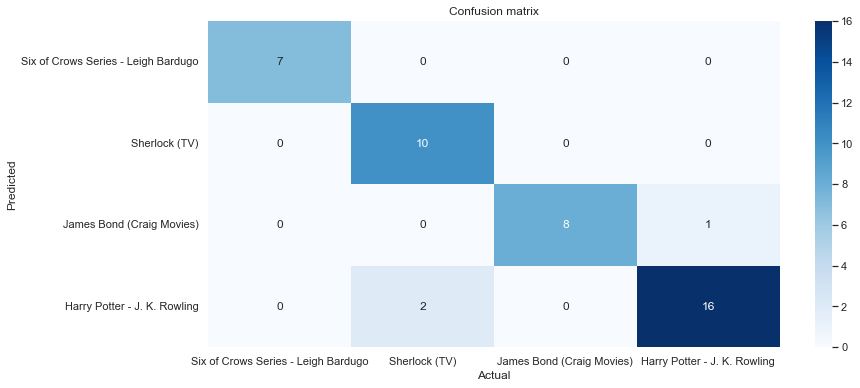

In [187]:
aux_df = df_clean5[['fandom', 'Fandom_Code']].drop_duplicates().sort_values('Fandom_Code')
conf_matrix = confusion_matrix(labels_test, knnc_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['fandom'].values, 
            yticklabels=aux_df['fandom'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [188]:
base_model = KNeighborsClassifier()
base_model.fit(features_train, labels_train)
accuracy_score(labels_test, base_model.predict(features_test))

0.9318181818181818

In [189]:
best_knnc.fit(features_train, labels_train)
accuracy_score(labels_test, best_knnc.predict(features_test))

0.9318181818181818

In [190]:
d = {
     'Model': 'KNN',
     'Training Set Accuracy': accuracy_score(labels_train, best_knnc.predict(features_train)),
     'Test Set Accuracy': accuracy_score(labels_test, knnc_pred)
}

df_models_knnc = pd.DataFrame(d, index=[0])

In [191]:
df_models_knnc

,Model,Training Set Accuracy,Test Set Accuracy
0,KNN,1.0,0.931818


In [193]:
with open('Models/fandom/best_knnc.pickle', 'wb') as output:
    pickle.dump(best_knnc, output)

with open('Models/fandom/df_models_knnc.pickle', 'wb') as output:
    pickle.dump(df_models_knnc, output)

## Random forest for fandom

In [194]:
import pickle
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [195]:
print(features_train.shape)
print(features_test.shape)

(176, 300)
(44, 300)


Cross-Validation for Hyperparameter tuning
First, we can see what hyperparameters the model has:

In [196]:
rf_0 = RandomForestClassifier(random_state = 8)

print('Parameters currently in use:\n')
pprint(rf_0.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 8,
 'verbose': 0,
 'warm_start': False}


In [197]:
# n_estimators
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]

# max_features
max_features = ['auto', 'sqrt']

# max_depth
max_depth = [int(x) for x in np.linspace(20, 100, num = 5)]
max_depth.append(None)

# min_samples_split
min_samples_split = [2, 5, 10]

# min_samples_leaf
min_samples_leaf = [1, 2, 4]

# bootstrap
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [20, 40, 60, 80, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000]}


In [198]:
# First create the base model to tune
rfc = RandomForestClassifier(random_state=8)

# Definition of the random search
random_search = RandomizedSearchCV(estimator=rfc,
                                   param_distributions=random_grid,
                                   n_iter=50,
                                   scoring='accuracy',
                                   cv=3, 
                                   verbose=1, 
                                   random_state=8)

# Fit the random search model
random_search.fit(features_train, labels_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=8),
                   n_iter=50,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [20, 40, 60, 80, 100,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]},
                   random_state=8, scoring='accuracy', verbose=1)

In [199]:
print("The best hyperparameters from Random Search are:")
print(random_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(random_search.best_score_)

The best hyperparameters from Random Search are:
{'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}

The mean accuracy of a model with these hyperparameters is:
0.909214884083382


In [200]:
# Create the parameter grid based on the results of random search 
bootstrap = [False]
max_depth = [30, 40, 50]
max_features = ['sqrt']
min_samples_leaf = [1, 2, 4]
min_samples_split = [5, 10, 15]
n_estimators = [800]

param_grid = {
    'bootstrap': bootstrap,
    'max_depth': max_depth,
    'max_features': max_features,
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split': min_samples_split,
    'n_estimators': n_estimators
}

# Create a base model
rfc = RandomForestClassifier(random_state=8)

# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rfc, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(features_train, labels_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=8, test_size=0.33, train_size=None),
             estimator=RandomForestClassifier(random_state=8),
             param_grid={'bootstrap': [False], 'max_depth': [30, 40, 50],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [5, 10, 15],
                         'n_estimators': [800]},
             scoring='accuracy', verbose=1)

In [201]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

The best hyperparameters from Grid Search are:
{'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 800}

The mean accuracy of a model with these hyperparameters is:
0.8926553672316384


In [202]:
best_rfc = grid_search.best_estimator_

In [203]:
best_rfc

RandomForestClassifier(bootstrap=False, max_depth=30, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=10,
                       n_estimators=800, random_state=8)

In [204]:
best_rfc.fit(features_train, labels_train)


RandomForestClassifier(bootstrap=False, max_depth=30, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=10,
                       n_estimators=800, random_state=8)

In [205]:
rfc_pred = best_rfc.predict(features_test)

In [206]:

# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(labels_train, best_rfc.predict(features_train)))

The training accuracy is: 
0.9943181818181818


In [207]:
# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(labels_test, rfc_pred))

The test accuracy is: 
0.9090909090909091


In [208]:
# Classification report
print("Classification report")
print(classification_report(labels_test,rfc_pred))

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        10
           2       1.00      0.56      0.71         9
           3       0.82      1.00      0.90        18

    accuracy                           0.91        44
   macro avg       0.95      0.89      0.90        44
weighted avg       0.93      0.91      0.90        44



In [211]:
df_clean5

,title,rating,fandom,character,additional tags,body,Body_Parsed_6,Body_Parsed,Fandom_Code
0,A Hundred Theories,General Audiences,Six of Crows Series - Leigh Bardugo,"Kaz Brekker, Inej Ghafa","Pre-Canon, Developing Friendships, Kaz Brekker...","\n\nKaz hated a puzzle he couldn't solve, and ...",kaz hat puzzle ' solve inej concoct h...,kaz hat puzzle solve inej concoct hu...,0
1,i'll tell you all about it (when i see you again),Not Rated,Six of Crows Series - Leigh Bardugo,"Matthias Helvar, Wylan Van Eck, Inej Ghafa, Ni...","Post-Book 2: Crooked Kingdom, Spoilers for Cro...",Matthias can barely hear himself think with th...,matthias barely hear think blood pound e...,matthias barely hear think blood pound e...,0
4,save me from myself (don't let me down),Teen And Up Audiences,Six of Crows Series - Leigh Bardugo,"Wylan Van Eck, Jesper Fahey","Nightmares, Hurt/Comfort, Angst, Wylan Van Eck...",Wylan gasped and thrashed as he struggled to s...,wylan gasp thrash struggle swim shore wav...,wylan gasp thrash struggle swim shore wav...,0
5,"You fell from the tree again, didn't you?",Teen And Up Audiences,Six of Crows Series - Leigh Bardugo,"Kaz Brekker, Jordie Rietveld, Jesper Fahey","Past, Kaz Brekker & Jesper Fahey Friendship, Y...",\n\nKaz was sitting under the tree in the back...,kaz sit tree backyard jordie jesper c...,kaz sit tree backyard jordie jesper c...,0
8,You knew them,General Audiences,Six of Crows Series - Leigh Bardugo,"Kaz Brekker, Kaz Brekker's Father, Kaz Brekker...","Character Death, Jordie Rietveld Lives, Big Br...",\n\nWhy did I come here. Kaz thought as Colm w...,come kaz think colm go issadora dece...,come kaz think colm go issadora dece...,0
...,...,...,...,...,...,...,...,...,...
379,The doe and the stag,Teen And Up Audiences,Harry Potter - J. K. Rowling,"James Potter, Lily Evans Potter, Minerva McGon...","Hurt/Comfort, Fluff, Marriage Proposal",James finds Lily after a distressing letter fr...,jam find lily distress letter sister offe...,jam find lily distress letter sister offe...,3
380,Payback is a real bitch,Explicit,Harry Potter - J. K. Rowling,"Harry Potter, Fred Weasley, George Weasley, Lu...","Revenge, Public Humiliation, Insane Harry Pott...",Harry huffed when he saw the headlines of the ...,harry huff saw headline daily prophetyet ...,harry huff saw headline daily prophetyet ...,3
381,All Mine (and His),Explicit,Harry Potter - J. K. Rowling,"Hermione Granger, Draco Malfoy, Charlie Weasley","Threesome - F/M/M, Polyamory, Getting Together...",Hermione wanted a baby. She wanted to be a mot...,hermione want baby want mother also sin...,hermione want baby want mother also sin...,3
384,In the Shadows (Wizarding War),Mature,Harry Potter - J. K. Rowling,"Original Characters, Sirius Black, James Potte...","Wizarding Wars (Harry Potter), Order of the Ph...",\n\n\n\n\n\nClaudia opened her eyes and glance...,claudia open eye glance little alarm cl...,claudia open eye glance little alarm cl...,3


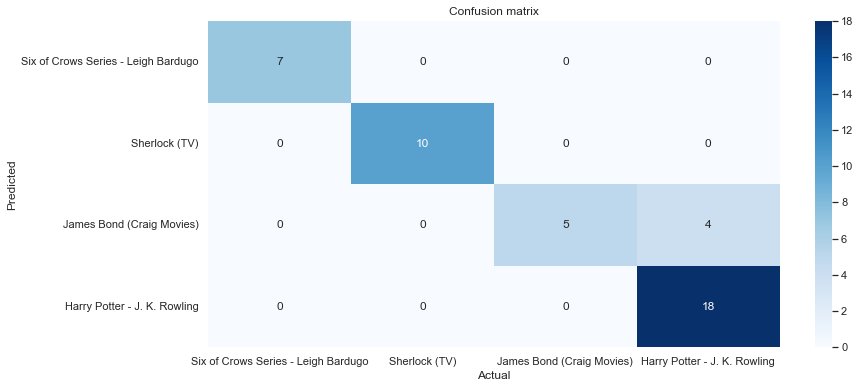

In [213]:
aux_df = df_clean5[['fandom', 'Fandom_Code']].drop_duplicates().sort_values('Fandom_Code')
conf_matrix = confusion_matrix(labels_test, rfc_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['fandom'].values, 
            yticklabels=aux_df['fandom'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [214]:
base_model = RandomForestClassifier(random_state = 8)
base_model.fit(features_train, labels_train)
accuracy_score(labels_test, base_model.predict(features_test))

0.9090909090909091

In [215]:
best_rfc.fit(features_train, labels_train)
accuracy_score(labels_test, best_rfc.predict(features_test))

0.9090909090909091

In [216]:
d = {
     'Model': 'Random Forest',
     'Training Set Accuracy': accuracy_score(labels_train, best_rfc.predict(features_train)),
     'Test Set Accuracy': accuracy_score(labels_test, rfc_pred)
}

df_models_rfc = pd.DataFrame(d, index=[0])

In [217]:
df_models_rfc

,Model,Training Set Accuracy,Test Set Accuracy
0,Random Forest,0.994318,0.909091


### Yeah I'm not gonna save this one. It got 90 accuracy while the knn gave 93 percent accuracy

## Repeat try to clean the data for categorizing the ratings for 220 fics, 4 fandoms
The following code is mostly copy pasted from this github repository
or don't clean the data and create features

In [64]:
rating_codes = {
    'General Audiences': 0,
    'Not Rated': 1,
    'Teen And Up Audiences': 2,
    'Mature': 3,
    'Explicit': 4,
}

In [65]:
# Category mapping
df_clean5['Rating_Code'] = df_clean5['rating']
df_clean5 = df_clean5.replace({'Rating_Code':rating_codes})
df_clean5

,title,rating,fandom,character,additional tags,body,Body_Parsed_6,Body_Parsed,Fandom_Code,Rating_Code
0,A Hundred Theories,General Audiences,Six of Crows Series - Leigh Bardugo,"Kaz Brekker, Inej Ghafa","Pre-Canon, Developing Friendships, Kaz Brekker...","\n\nKaz hated a puzzle he couldn't solve, and ...",kaz hat puzzle ' solve inej concoct h...,kaz hat puzzle solve inej concoct hu...,0,0
1,i'll tell you all about it (when i see you again),Not Rated,Six of Crows Series - Leigh Bardugo,"Matthias Helvar, Wylan Van Eck, Inej Ghafa, Ni...","Post-Book 2: Crooked Kingdom, Spoilers for Cro...",Matthias can barely hear himself think with th...,matthias barely hear think blood pound e...,matthias barely hear think blood pound e...,0,1
4,save me from myself (don't let me down),Teen And Up Audiences,Six of Crows Series - Leigh Bardugo,"Wylan Van Eck, Jesper Fahey","Nightmares, Hurt/Comfort, Angst, Wylan Van Eck...",Wylan gasped and thrashed as he struggled to s...,wylan gasp thrash struggle swim shore wav...,wylan gasp thrash struggle swim shore wav...,0,2
5,"You fell from the tree again, didn't you?",Teen And Up Audiences,Six of Crows Series - Leigh Bardugo,"Kaz Brekker, Jordie Rietveld, Jesper Fahey","Past, Kaz Brekker & Jesper Fahey Friendship, Y...",\n\nKaz was sitting under the tree in the back...,kaz sit tree backyard jordie jesper c...,kaz sit tree backyard jordie jesper c...,0,2
8,You knew them,General Audiences,Six of Crows Series - Leigh Bardugo,"Kaz Brekker, Kaz Brekker's Father, Kaz Brekker...","Character Death, Jordie Rietveld Lives, Big Br...",\n\nWhy did I come here. Kaz thought as Colm w...,come kaz think colm go issadora dece...,come kaz think colm go issadora dece...,0,0
...,...,...,...,...,...,...,...,...,...,...
379,The doe and the stag,Teen And Up Audiences,Harry Potter - J. K. Rowling,"James Potter, Lily Evans Potter, Minerva McGon...","Hurt/Comfort, Fluff, Marriage Proposal",James finds Lily after a distressing letter fr...,jam find lily distress letter sister offe...,jam find lily distress letter sister offe...,3,2
380,Payback is a real bitch,Explicit,Harry Potter - J. K. Rowling,"Harry Potter, Fred Weasley, George Weasley, Lu...","Revenge, Public Humiliation, Insane Harry Pott...",Harry huffed when he saw the headlines of the ...,harry huff saw headline daily prophetyet ...,harry huff saw headline daily prophetyet ...,3,4
381,All Mine (and His),Explicit,Harry Potter - J. K. Rowling,"Hermione Granger, Draco Malfoy, Charlie Weasley","Threesome - F/M/M, Polyamory, Getting Together...",Hermione wanted a baby. She wanted to be a mot...,hermione want baby want mother also sin...,hermione want baby want mother also sin...,3,4
384,In the Shadows (Wizarding War),Mature,Harry Potter - J. K. Rowling,"Original Characters, Sirius Black, James Potte...","Wizarding Wars (Harry Potter), Order of the Ph...",\n\n\n\n\n\nClaudia opened her eyes and glance...,claudia open eye glance little alarm cl...,claudia open eye glance little alarm cl...,3,3


In [66]:
X_train, X_test, y_train, y_test = train_test_split(df_clean5['Body_Parsed'], 
                                                    df_clean5['Rating_Code'], 
                                                    test_size=0.2, 
                                                    random_state=8)

In [67]:
# Parameter election
ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features = 300

In [68]:
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)
                        
features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
print(features_train.shape)

features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print(features_test.shape)

(176, 300)
(44, 300)


In [71]:
from sklearn.feature_selection import chi2
import numpy as np

for Product, category_id in sorted(rating_codes.items()):
    features_chi2 = chi2(features_train, labels_train == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}' category:".format(Product))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-7:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-2:])))
    print("")

# 'Explicit' category:
  . Most correlated unigrams:
. matthias
. brekker
. inej
. sherlock
. kaz
. john
. press
  . Most correlated bigrams:
. shake head
. van eck

# 'General Audiences' category:
  . Most correlated unigrams:
. fuck
. thank
. inej
. night
. girl
. kaz
. father
  . Most correlated bigrams:
. van eck
. shake head

# 'Mature' category:
  . Most correlated unigrams:
. inej
. kaz
. sirius
. wylan
. jesper
. men
. jam
  . Most correlated bigrams:
. shake head
. van eck

# 'Not Rated' category:
  . Most correlated unigrams:
. matthias
. john
. brekker
. inej
. nina
. kaz
. sherlock
  . Most correlated bigrams:
. van eck
. shake head

# 'Teen And Up Audiences' category:
  . Most correlated unigrams:
. since
. sorry
. jam
. jesper
. eck
. van
. wylan
  . Most correlated bigrams:
. shake head
. van eck



### I want to try again with ratings but with the entire dataset !  df so I can use all fandoms.
### It appears it associates characters with different ratings.... which is weird I will try again and see if I want to keep evaluating ratings



In [10]:
df
df_clean = df
df_clean

,work_id,title,author,rating,category,fandom,relationship,character,additional tags,language,...,status date,words,chapters,comments,kudos,bookmarks,hits,all_kudos,all_bookmarks,body
0,38068225,A Hundred Theories,['genuineformality'],General Audiences,Gen,Six of Crows Series - Leigh Bardugo,Kaz Brekker/Inej Ghafa,"Kaz Brekker, Inej Ghafa","Pre-Canon, Developing Friendships, Kaz Brekker...",English,...,2022-03-31,2091,1/1,32.0,82.0,4.0,387,"['majeda', 'crackbaby13', 'Starryskyondragonsb...",[],"\n\nKaz hated a puzzle he couldn't solve, and ..."
1,38010298,i'll tell you all about it (when i see you again),['people_watching'],Not Rated,NaN,Six of Crows Series - Leigh Bardugo,"Matthias Helvar/Nina Zenik, Kaz Brekker/Inej G...","Matthias Helvar, Wylan Van Eck, Inej Ghafa, Ni...","Post-Book 2: Crooked Kingdom, Spoilers for Cro...",English,...,2022-03-31,2656,3/6,4.0,17.0,1.0,258,"['carry_on_simon', 'Elevatornotworthy_1', 'Oli...",[],Matthias can barely hear himself think with th...
2,35211865,Where Do Broken Hearts Go?,['RupturedHaven'],General Audiences,"F/M, M/M, Multi","The Grisha Trilogy - Leigh Bardugo, Shadow and...","Kaz Brekker/Inej Ghafa, Jesper Fahey/Wylan Van...","Kaz Brekker, Inej Ghafa, Jesper Fahey, Wylan V...","Kanej - Freeform, Six of Crows, Grishaverse, s...",English,...,2022-03-30,38366,17/?,70.0,328.0,33.0,7125,"['Lucixeve', 'sjonsson97', 'crowandcup', 'Guew...",[],\n~\n1\n~\n\n\n\nINEJ\n\n\nInej held the door ...
3,38027824,Kanej oneshots to fill the hole in my heart,['itsraingcatsanddogs'],Teen And Up Audiences,Multi,"Six of Crows Series - Leigh Bardugo, The Grish...","Kaz Brekker/Inej Ghafa, Kaz Brekker & Inej Ghafa","Kaz Brekker, Inej Ghafa, Original Kaz Brekker/...","Kanej - Freeform, Post-Book 2: Crooked Kingdom...",English,...,2022-03-30,1915,2/?,NaN,4.0,NaN,294,['IReadBooksForFun'],[],It was a busy day in the Barrel. It was always...
4,38066179,save me from myself (don't let me down),['xxartistintrainingxx'],Teen And Up Audiences,M/M,Six of Crows Series - Leigh Bardugo,Jesper Fahey/Wylan Van Eck,"Wylan Van Eck, Jesper Fahey","Nightmares, Hurt/Comfort, Angst, Wylan Van Eck...",English,...,2022-03-30,2174,1/1,4.0,36.0,4.0,397,"['ThatOddNerd', 'bee_slut', 'Reader2005', 'Boo...",[],Wylan gasped and thrashed as he struggled to s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,38106892,All Mine (and His),['maraudersaffair'],Explicit,F/M,Harry Potter - J. K. Rowling,"Hermione Granger/Draco Malfoy, Hermione Grange...","Hermione Granger, Draco Malfoy, Charlie Weasley","Threesome - F/M/M, Polyamory, Getting Together...",English,...,2022-04-01,5019,1/1,2.0,73.0,9.0,1916,"['Cookiemom14', 'JamesLethe', 'Trichardson', '...",[],Hermione wanted a baby. She wanted to be a mot...
382,38106853,La bibliotheque aux mille livres,['NekoKirei'],Teen And Up Audiences,Other,Harry Potter - J. K. Rowling,NaN,"Ginny Weasley, Theodore Nott",Tom Riddle's Diary,Francais,...,2022-04-01,422,1/1,NaN,2.0,NaN,4,[],[],"Elle avait juste besoin de s'asseoir, loin de ..."
383,37316926,Jack's Snowflake,['TheologyDiscography'],General Audiences,Gen,"Harry Potter - J. K. Rowling, Rise of the Guar...",Jack Frost (Guardians of Childhood)/Harry Potter,"Harry Potter, Jack Frost (Guardians of Childhood)","Pre-Canon, Canonical Child Abuse, Fluff, Hurt/...",English,...,2022-04-01,1906,6/?,8.0,99.0,29.0,916,"['jaskier09', 'ItsBiancaNeve', 'CatNip_618', '...",[],Jack dropped to the ground next to the li...
384,31236521,In the Shadows (Wizarding War),['CL_Avery'],Mature,"F/M, Multi",Harry Potter - J. K. Rowling,"Sirius Black/Original Female Character(s), Jam...","Original Characters, Sirius Black, James Potte...","Wizarding Wars (Harry Potter), Order of the Ph...",English,...,2022-04-01,134525,24/?,36.0,50.0,15.0,1941,"['LaInternettuale', 'Darie1_6', 'Lady_Murphyy'...",[],\n\n\n\n\n\nClaudia opened her eyes and glance...


In [11]:
# \r and \n
df_clean['Content_Parsed_1'] = df_clean['body'].str.replace("\r", " ")
df_clean['Content_Parsed_1'] = df_clean['Content_Parsed_1'].str.replace("\n", " ")
df_clean['Content_Parsed_1'] = df_clean['Content_Parsed_1'].str.replace("\t", " ")
df_clean['Content_Parsed_1'] = df_clean['Content_Parsed_1'].str.replace("    ", " ")

In [12]:
text = "Mr Greenspan\'s"
text

"Mr Greenspan's"

In [13]:
df_clean["Content_Parsed_1"][1]

'Matthias can barely hear himself think with the blood pounding in his ears. He\'d seen the anger in the young boy\'s eyes, had seen the gun, but somehow, hadn\'t expected to be shot. He needs to get to Nina. As he tries to navigate the streets of Ketterdam with a bullet wound, he remembers one of the conversations he\'d first had with... well. His friends. Weeks ago, when they were working on the Ice Court mission. Jesper had made a comment about if they died, that he was going to make Wylan\'s ghost teach him to play the flute so he could annoy Kaz for eternity. Kaz had said he\'d just hire Matthias\'s ghost to kick Jesper\'s ghost\'s ass.  Matthias had said his ghost wouldn\'t associate with Kaz\'s.  He\'d felt so strange, making a joking comment with these people, people he thought were the worst kind of people. He\'d felt like an idiot even saying anything in response. Matthias looks back at the Ice Court mission with a weird combination of bitterness and fondness. He\'d hated bei

In [14]:
# " when quoting text
df_clean['Content_Parsed_1'] = df_clean['Content_Parsed_1'].str.replace('"', '')

In [15]:
# Lowercasing the text
df_clean['Content_Parsed_2'] = df_clean['Content_Parsed_1'].str.lower()

In [16]:
punctuation_signs = list("?:!.,;")
df_clean['Content_Parsed_3'] = df_clean['Content_Parsed_2']

for punct_sign in punctuation_signs:
    df_clean['Content_Parsed_3'] = df_clean['Content_Parsed_3'].str.replace(punct_sign, '')

/var/folders/71/4rsjchkn5x53kknkrcwhky5m0000gn/T/ipykernel_26818/3409985913.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_clean['Content_Parsed_3'] = df_clean['Content_Parsed_3'].str.replace(punct_sign, '')


In [17]:
df_clean['Content_Parsed_4'] = df_clean['Content_Parsed_3'].str.replace("'s", "")

In [20]:
# Downloading punkt and wordnet from NLTK
nltk.download('punkt')
print("------------------------------------------------------------")
nltk.download('wordnet')

------------------------------------------------------------


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/waverlywang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/waverlywang/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [21]:
wordnet_lemmatizer = WordNetLemmatizer()

In [22]:
nrows = len(df)
lemmatized_text_list = []

for row in range(0, nrows):
    
    # Create an empty list containing lemmatized words
    lemmatized_list = []
    
    # Save the text and its words into an object
    text = df_clean.loc[row]['Content_Parsed_4']
    text_words = text.split(" ")

    # Iterate through every word to lemmatize
    for word in text_words:
        lemmatized_list.append(wordnet_lemmatizer.lemmatize(word, pos="v"))
        
    # Join the list
    lemmatized_text = " ".join(lemmatized_list)
    
    # Append to the list containing the texts
    lemmatized_text_list.append(lemmatized_text)

In [23]:
df_clean['Content_Parsed_5'] = lemmatized_text_list

In [24]:
stop_words = list(stopwords.words('english'))

In [25]:
stop_words[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [26]:
example = "me eating a meal"
word = "me"

# The regular expression is:
regex = r"\b" + word + r"\b"  # we need to build it like that to work properly

re.sub(regex, "StopWord", example)

'StopWord eating a meal'

In [27]:
df_clean['Content_Parsed_6'] = df_clean['Content_Parsed_5']

for stop_word in stop_words:

    regex_stopword = r"\b" + stop_word + r"\b"
    df_clean['Content_Parsed_6'] = df_clean['Content_Parsed_6'].str.replace(regex_stopword, '')

/var/folders/71/4rsjchkn5x53kknkrcwhky5m0000gn/T/ipykernel_26818/1214412051.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df_clean['Content_Parsed_6'] = df_clean['Content_Parsed_6'].str.replace(regex_stopword, '')


In [28]:
df_clean.loc[5]['body']

'\n\nKaz was sitting under the tree in the backyard when Jordie and Jesper came running over. Jesper was staying for the weekend and their Da was busy, meaning Jordie was in charge. Normally taking care of Kaz was easy, but he and Jesper seemed to always see everything as a challenge, which is probably why, Jordie assumed, Kaz was injured.\n\n"Hi Jordie." Kaz said waving at him.\n\n"No, not \'Hi Jordie\' your injured. You climbed the tree again, didn\'t you?" Jordie asked and shook his head.\n\n"Yeah, but I didn\'t know the branch would break." Kaz said as Jordie inspected him for anything major.\n\n"Well, your legs and left arm are fine."\n\n"My left arm? What about-"\n\n"Your wrist is broken on the right."\n\nKaz\'s eyes grew wide and Jordie realized his mistake. Kaz was only seven and the idea of a broken bone seemed terrifying.\n\n"Hey, but it\'s alright. I will get a doctor from town and Jesper will help you have lunch."\n\nJesper chimed in now. "I will?"\n\n"Yes, you will." Jordi

In [29]:
df_clean.loc[5]['Content_Parsed_2']

"  kaz was sitting under the tree in the backyard when jordie and jesper came running over. jesper was staying for the weekend and their da was busy, meaning jordie was in charge. normally taking care of kaz was easy, but he and jesper seemed to always see everything as a challenge, which is probably why, jordie assumed, kaz was injured.  hi jordie. kaz said waving at him.  no, not 'hi jordie' your injured. you climbed the tree again, didn't you? jordie asked and shook his head.  yeah, but i didn't know the branch would break. kaz said as jordie inspected him for anything major.  well, your legs and left arm are fine.  my left arm? what about-  your wrist is broken on the right.  kaz's eyes grew wide and jordie realized his mistake. kaz was only seven and the idea of a broken bone seemed terrifying.  hey, but it's alright. i will get a doctor from town and jesper will help you have lunch.  jesper chimed in now. i will?  yes, you will. jordie said through gritted teeth and jesper nodded

In [30]:
df_clean.loc[5]['Content_Parsed_3']

"  kaz was sitting under the tree in the backyard when jordie and jesper came running over jesper was staying for the weekend and their da was busy meaning jordie was in charge normally taking care of kaz was easy but he and jesper seemed to always see everything as a challenge which is probably why jordie assumed kaz was injured  hi jordie kaz said waving at him  no not 'hi jordie' your injured you climbed the tree again didn't you jordie asked and shook his head  yeah but i didn't know the branch would break kaz said as jordie inspected him for anything major  well your legs and left arm are fine  my left arm what about-  your wrist is broken on the right  kaz's eyes grew wide and jordie realized his mistake kaz was only seven and the idea of a broken bone seemed terrifying  hey but it's alright i will get a doctor from town and jesper will help you have lunch  jesper chimed in now i will  yes you will jordie said through gritted teeth and jesper nodded in agreement afraid of what mi

In [31]:
df_clean.loc[5]['Content_Parsed_4']

"  kaz was sitting under the tree in the backyard when jordie and jesper came running over jesper was staying for the weekend and their da was busy meaning jordie was in charge normally taking care of kaz was easy but he and jesper seemed to always see everything as a challenge which is probably why jordie assumed kaz was injured  hi jordie kaz said waving at him  no not 'hi jordie' your injured you climbed the tree again didn't you jordie asked and shook his head  yeah but i didn't know the branch would break kaz said as jordie inspected him for anything major  well your legs and left arm are fine  my left arm what about-  your wrist is broken on the right  kaz eyes grew wide and jordie realized his mistake kaz was only seven and the idea of a broken bone seemed terrifying  hey but it alright i will get a doctor from town and jesper will help you have lunch  jesper chimed in now i will  yes you will jordie said through gritted teeth and jesper nodded in agreement afraid of what might 

In [32]:
df_clean.loc[5]['Content_Parsed_5']

"  kaz be sit under the tree in the backyard when jordie and jesper come run over jesper be stay for the weekend and their da be busy mean jordie be in charge normally take care of kaz be easy but he and jesper seem to always see everything as a challenge which be probably why jordie assume kaz be injure  hi jordie kaz say wave at him  no not 'hi jordie' your injure you climb the tree again didn't you jordie ask and shake his head  yeah but i didn't know the branch would break kaz say as jordie inspect him for anything major  well your legs and leave arm be fine  my leave arm what about-  your wrist be break on the right  kaz eye grow wide and jordie realize his mistake kaz be only seven and the idea of a break bone seem terrify  hey but it alright i will get a doctor from town and jesper will help you have lunch  jesper chime in now i will  yes you will jordie say through grit teeth and jesper nod in agreement afraid of what might happen if he refuse  after he make sure jesper and kaz

In [33]:
df_clean.loc[5]['Content_Parsed_6']

"  kaz  sit   tree   backyard  jordie  jesper come run  jesper  stay   weekend   da  busy mean jordie   charge normally take care  kaz  easy    jesper seem  always see everything   challenge   probably  jordie assume kaz  injure  hi jordie kaz say wave      'hi jordie'  injure  climb  tree  '  jordie ask  shake  head  yeah   ' know  branch would break kaz say  jordie inspect   anything major  well  legs  leave arm  fine   leave arm  -   wrist  break   right  kaz eye grow wide  jordie realize  mistake kaz   seven   idea   break bone seem terrify  hey   alright   get  doctor  town  jesper  help   lunch  jesper chime      yes   jordie say  grit teeth  jesper nod  agreement afraid   might happen   refuse    make sure jesper  kaz  inside   kaz    position   could eat without hurt  wrist  go  town  ride ' take long  horse   find  doctor  something     journey  tell     paranoid   lead  doctor towards home  look   mountains   road watch   cloud pass    cloud ' move  mountains     see   ask  d

In [34]:

df_clean['Content_Parsed_6'] = df_clean['Content_Parsed_6'].str.replace("'", "")

In [35]:
df_clean

,work_id,title,author,rating,category,fandom,relationship,character,additional tags,language,...,hits,all_kudos,all_bookmarks,body,Content_Parsed_1,Content_Parsed_2,Content_Parsed_3,Content_Parsed_4,Content_Parsed_5,Content_Parsed_6
0,38068225,A Hundred Theories,['genuineformality'],General Audiences,Gen,Six of Crows Series - Leigh Bardugo,Kaz Brekker/Inej Ghafa,"Kaz Brekker, Inej Ghafa","Pre-Canon, Developing Friendships, Kaz Brekker...",English,...,387,"['majeda', 'crackbaby13', 'Starryskyondragonsb...",[],"\n\nKaz hated a puzzle he couldn't solve, and ...","Kaz hated a puzzle he couldn't solve, and he...","kaz hated a puzzle he couldn't solve, and he...",kaz hated a puzzle he couldn't solve and he ...,kaz hated a puzzle he couldn't solve and he ...,kaz hat a puzzle he couldn't solve and he an...,kaz hat puzzle solve inej concoct hu...
1,38010298,i'll tell you all about it (when i see you again),['people_watching'],Not Rated,NaN,Six of Crows Series - Leigh Bardugo,"Matthias Helvar/Nina Zenik, Kaz Brekker/Inej G...","Matthias Helvar, Wylan Van Eck, Inej Ghafa, Ni...","Post-Book 2: Crooked Kingdom, Spoilers for Cro...",English,...,258,"['carry_on_simon', 'Elevatornotworthy_1', 'Oli...",[],Matthias can barely hear himself think with th...,Matthias can barely hear himself think with th...,matthias can barely hear himself think with th...,matthias can barely hear himself think with th...,matthias can barely hear himself think with th...,matthias can barely hear himself think with th...,matthias barely hear think blood pound e...
2,35211865,Where Do Broken Hearts Go?,['RupturedHaven'],General Audiences,"F/M, M/M, Multi","The Grisha Trilogy - Leigh Bardugo, Shadow and...","Kaz Brekker/Inej Ghafa, Jesper Fahey/Wylan Van...","Kaz Brekker, Inej Ghafa, Jesper Fahey, Wylan V...","Kanej - Freeform, Six of Crows, Grishaverse, s...",English,...,7125,"['Lucixeve', 'sjonsson97', 'crowandcup', 'Guew...",[],\n~\n1\n~\n\n\n\nINEJ\n\n\nInej held the door ...,~ 1 ~ INEJ Inej held the door open with her...,~ 1 ~ inej inej held the door open with her...,~ 1 ~ inej inej held the door open with her...,~ 1 ~ inej inej held the door open with her...,~ 1 ~ inej inej hold the door open with her...,~ 1 ~ inej inej hold door open foot ha...
3,38027824,Kanej oneshots to fill the hole in my heart,['itsraingcatsanddogs'],Teen And Up Audiences,Multi,"Six of Crows Series - Leigh Bardugo, The Grish...","Kaz Brekker/Inej Ghafa, Kaz Brekker & Inej Ghafa","Kaz Brekker, Inej Ghafa, Original Kaz Brekker/...","Kanej - Freeform, Post-Book 2: Crooked Kingdom...",English,...,294,['IReadBooksForFun'],[],It was a busy day in the Barrel. It was always...,It was a busy day in the Barrel. It was always...,it was a busy day in the barrel. it was always...,it was a busy day in the barrel it was always ...,it was a busy day in the barrel it was always ...,it be a busy day in the barrel it be always a ...,busy day barrel always busy day new i...
4,38066179,save me from myself (don't let me down),['xxartistintrainingxx'],Teen And Up Audiences,M/M,Six of Crows Series - Leigh Bardugo,Jesper Fahey/Wylan Van Eck,"Wylan Van Eck, Jesper Fahey","Nightmares, Hurt/Comfort, Angst, Wylan Van Eck...",English,...,397,"['ThatOddNerd', 'bee_slut', 'Reader2005', 'Boo...",[],Wylan gasped and thrashed as he struggled to s...,Wylan gasped and thrashed as he struggled to s...,wylan gasped and thrashed as he struggled to s...,wylan gasped and thrashed as he struggled to s...,wylan gasped and thrashed as he struggled to s...,wylan gasp and thrash as he struggle to swim t...,wylan gasp thrash struggle swim shore wav...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,38106892,All Mine (and His),['maraudersaffair'],Explicit,F/M,Harry Potter - J. K. Rowling,"Hermione Granger/Draco Malfoy, Hermione Grange...","Hermione Granger, Draco Malfoy, Charlie Weasley","Threesome - F/M/M, Polyamory, Getting Together...",English,...,1916,"['Cookiemom14', 'JamesLethe', 'Tricha

In [36]:
list_columns = ["title", "rating", "fandom", "body", "Content_Parsed_6"]
df_clean = df_clean[list_columns]

df_clean = df_clean.rename(columns={'Content_Parsed_6': 'Content_Parsed'})

In [37]:
df_clean

,title,rating,fandom,body,Content_Parsed
0,A Hundred Theories,General Audiences,Six of Crows Series - Leigh Bardugo,"\n\nKaz hated a puzzle he couldn't solve, and ...",kaz hat puzzle solve inej concoct hu...
1,i'll tell you all about it (when i see you again),Not Rated,Six of Crows Series - Leigh Bardugo,Matthias can barely hear himself think with th...,matthias barely hear think blood pound e...
2,Where Do Broken Hearts Go?,General Audiences,"The Grisha Trilogy - Leigh Bardugo, Shadow and...",\n~\n1\n~\n\n\n\nINEJ\n\n\nInej held the door ...,~ 1 ~ inej inej hold door open foot ha...
3,Kanej oneshots to fill the hole in my heart,Teen And Up Audiences,"Six of Crows Series - Leigh Bardugo, The Grish...",It was a busy day in the Barrel. It was always...,busy day barrel always busy day new i...
4,save me from myself (don't let me down),Teen And Up Audiences,Six of Crows Series - Leigh Bardugo,Wylan gasped and thrashed as he struggled to s...,wylan gasp thrash struggle swim shore wav...
...,...,...,...,...,...
381,All Mine (and His),Explicit,Harry Potter - J. K. Rowling,Hermione wanted a baby. She wanted to be a mot...,hermione want baby want mother also sin...
382,La bibliotheque aux mille livres,Teen And Up Audiences,Harry Potter - J. K. Rowling,"Elle avait juste besoin de s'asseoir, loin de ...",elle avait juste besoin de asseoir loin de ses...
383,Jack's Snowflake,General Audiences,"Harry Potter - J. K. Rowling, Rise of the Guar...",Jack dropped to the ground next to the li...,jack drop grind next little boy sit me...
384,In the Shadows (Wizarding War),Mature,Harry Potter - J. K. Rowling,\n\n\n\n\n\nClaudia opened her eyes and glance...,claudia open eye glance little alarm cl...


In [38]:
df_clean['Content_Parsed'] = df_clean['Content_Parsed'].str.replace("~", "")

In [40]:
rating_codes = {
    'General Audiences': 0,
    'Not Rated': 1,
    'Teen And Up Audiences': 2,
    'Mature': 3,
    'Explicit': 4,
}

In [41]:
# Category mapping
df_clean['Rating_Code'] = df_clean['rating']
df_clean = df_clean.replace({'Rating_Code':rating_codes})

In [42]:
df_clean

,title,rating,fandom,body,Content_Parsed,Rating_Code
0,A Hundred Theories,General Audiences,Six of Crows Series - Leigh Bardugo,"\n\nKaz hated a puzzle he couldn't solve, and ...",kaz hat puzzle solve inej concoct hu...,0
1,i'll tell you all about it (when i see you again),Not Rated,Six of Crows Series - Leigh Bardugo,Matthias can barely hear himself think with th...,matthias barely hear think blood pound e...,1
2,Where Do Broken Hearts Go?,General Audiences,"The Grisha Trilogy - Leigh Bardugo, Shadow and...",\n~\n1\n~\n\n\n\nINEJ\n\n\nInej held the door ...,1 inej inej hold door open foot haul...,0
3,Kanej oneshots to fill the hole in my heart,Teen And Up Audiences,"Six of Crows Series - Leigh Bardugo, The Grish...",It was a busy day in the Barrel. It was always...,busy day barrel always busy day new i...,2
4,save me from myself (don't let me down),Teen And Up Audiences,Six of Crows Series - Leigh Bardugo,Wylan gasped and thrashed as he struggled to s...,wylan gasp thrash struggle swim shore wav...,2
...,...,...,...,...,...,...
381,All Mine (and His),Explicit,Harry Potter - J. K. Rowling,Hermione wanted a baby. She wanted to be a mot...,hermione want baby want mother also sin...,4
382,La bibliotheque aux mille livres,Teen And Up Audiences,Harry Potter - J. K. Rowling,"Elle avait juste besoin de s'asseoir, loin de ...",elle avait juste besoin de asseoir loin de ses...,2
383,Jack's Snowflake,General Audiences,"Harry Potter - J. K. Rowling, Rise of the Guar...",Jack dropped to the ground next to the li...,jack drop grind next little boy sit me...,0
384,In the Shadows (Wizarding War),Mature,Harry Potter - J. K. Rowling,\n\n\n\n\n\nClaudia opened her eyes and glance...,claudia open eye glance little alarm cl...,3


In [43]:
##note to SELF DROP ROWS AS LAST THING TO DO!!!
df_clean
language = []
for i in range(0, len(df)):
    if df["language"][i] != "English":
        language+= [i]
print(language)

[6, 12, 195, 198, 201, 202, 205, 210, 215, 221, 224, 229, 237, 238, 241, 243, 244, 245, 246, 247, 248, 251, 253, 256, 257, 262, 266, 270, 273, 274, 282, 284, 351, 363, 368, 374, 378, 382]


In [49]:
ROW = 0
df_clean = df_clean.drop(language, axis = ROW)


In [50]:
df_clean

,title,rating,fandom,body,Content_Parsed,Rating_Code
0,A Hundred Theories,General Audiences,Six of Crows Series - Leigh Bardugo,"\n\nKaz hated a puzzle he couldn't solve, and ...",kaz hat puzzle solve inej concoct hu...,0
1,i'll tell you all about it (when i see you again),Not Rated,Six of Crows Series - Leigh Bardugo,Matthias can barely hear himself think with th...,matthias barely hear think blood pound e...,1
2,Where Do Broken Hearts Go?,General Audiences,"The Grisha Trilogy - Leigh Bardugo, Shadow and...",\n~\n1\n~\n\n\n\nINEJ\n\n\nInej held the door ...,1 inej inej hold door open foot haul...,0
3,Kanej oneshots to fill the hole in my heart,Teen And Up Audiences,"Six of Crows Series - Leigh Bardugo, The Grish...",It was a busy day in the Barrel. It was always...,busy day barrel always busy day new i...,2
4,save me from myself (don't let me down),Teen And Up Audiences,Six of Crows Series - Leigh Bardugo,Wylan gasped and thrashed as he struggled to s...,wylan gasp thrash struggle swim shore wav...,2
...,...,...,...,...,...,...
380,Payback is a real bitch,Explicit,Harry Potter - J. K. Rowling,Harry huffed when he saw the headlines of the ...,harry huff saw headline daily prophetyet ...,4
381,All Mine (and His),Explicit,Harry Potter - J. K. Rowling,Hermione wanted a baby. She wanted to be a mot...,hermione want baby want mother also sin...,4
383,Jack's Snowflake,General Audiences,"Harry Potter - J. K. Rowling, Rise of the Guar...",Jack dropped to the ground next to the li...,jack drop grind next little boy sit me...,0
384,In the Shadows (Wizarding War),Mature,Harry Potter - J. K. Rowling,\n\n\n\n\n\nClaudia opened her eyes and glance...,claudia open eye glance little alarm cl...,3


In [51]:
X_train, X_test, y_train, y_test = train_test_split(df_clean['Content_Parsed'], 
                                                    df_clean['Rating_Code'], 
                                                    test_size=0.15, 
                                                    random_state=8)

In [52]:
# Parameter election
ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features = 300

In [53]:
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)
                        
features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
print(features_train.shape)

features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print(features_test.shape)

(295, 300)
(53, 300)


In [54]:
from sklearn.feature_selection import chi2
import numpy as np

for Product, category_id in sorted(rating_codes.items()):
    features_chi2 = chi2(features_train, labels_train == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}' category:".format(Product))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-5:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-2:])))
    print("")

# 'Explicit' category:
  . Most correlated unigrams:
. nina
. lips
. sherlock
. press
. john
  . Most correlated bigrams:
. inej ghafa
. kaz brekker

# 'General Audiences' category:
  . Most correlated unigrams:
. soon
. fuck
. sleep
. gaze
. de
  . Most correlated bigrams:
. van eck
. jesper fahey

# 'Mature' category:
  . Most correlated unigrams:
. jesper
. mycroft
. de
. wylan
. jam
  . Most correlated bigrams:
. jesper fahey
. nina zenik

# 'Not Rated' category:
  . Most correlated unigrams:
. nina
. zenik
. sherlock
. jordie
. john
  . Most correlated bigrams:
. jesper fahey
. nina zenik

# 'Teen And Up Audiences' category:
  . Most correlated unigrams:
. nina
. sherlock
. fahey
. van
. wylan
  . Most correlated bigrams:
. kaz brekker
. van eck



In [55]:
bigrams

['shake head',
 'nina zenik',
 'inej ghafa',
 'jesper fahey',
 'kaz brekker',
 'van eck']

In [56]:

df_clean

,title,rating,fandom,body,Content_Parsed,Rating_Code
0,A Hundred Theories,General Audiences,Six of Crows Series - Leigh Bardugo,"\n\nKaz hated a puzzle he couldn't solve, and ...",kaz hat puzzle solve inej concoct hu...,0
1,i'll tell you all about it (when i see you again),Not Rated,Six of Crows Series - Leigh Bardugo,Matthias can barely hear himself think with th...,matthias barely hear think blood pound e...,1
2,Where Do Broken Hearts Go?,General Audiences,"The Grisha Trilogy - Leigh Bardugo, Shadow and...",\n~\n1\n~\n\n\n\nINEJ\n\n\nInej held the door ...,1 inej inej hold door open foot haul...,0
3,Kanej oneshots to fill the hole in my heart,Teen And Up Audiences,"Six of Crows Series - Leigh Bardugo, The Grish...",It was a busy day in the Barrel. It was always...,busy day barrel always busy day new i...,2
4,save me from myself (don't let me down),Teen And Up Audiences,Six of Crows Series - Leigh Bardugo,Wylan gasped and thrashed as he struggled to s...,wylan gasp thrash struggle swim shore wav...,2
...,...,...,...,...,...,...
380,Payback is a real bitch,Explicit,Harry Potter - J. K. Rowling,Harry huffed when he saw the headlines of the ...,harry huff saw headline daily prophetyet ...,4
381,All Mine (and His),Explicit,Harry Potter - J. K. Rowling,Hermione wanted a baby. She wanted to be a mot...,hermione want baby want mother also sin...,4
383,Jack's Snowflake,General Audiences,"Harry Potter - J. K. Rowling, Rise of the Guar...",Jack dropped to the ground next to the li...,jack drop grind next little boy sit me...,0
384,In the Shadows (Wizarding War),Mature,Harry Potter - J. K. Rowling,\n\n\n\n\n\nClaudia opened her eyes and glance...,claudia open eye glance little alarm cl...,3


In [61]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348 entries, 0 to 385
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           348 non-null    object
 1   rating          348 non-null    object
 2   fandom          348 non-null    object
 3   body            348 non-null    object
 4   Content_Parsed  348 non-null    object
 5   Rating_Code     348 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 19.0+ KB


### Fascinating stuff! I will continue training stuff with this. it seems cool. It used 348 fanfics 

In [57]:
print(features_train.shape)
print(features_test.shape)

(295, 300)
(53, 300)


### Knn Model for Rating

In [ ]:
import pickle
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Cross-Validation for Hyperparameter tuning
First, we can see what hyperparameters the model has:

In [58]:
knnc_0 =KNeighborsClassifier()

print('Parameters currently in use:\n')
pprint(knnc_0.get_params())

Parameters currently in use:

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}


In [62]:
# Create the parameter grid 
n_neighbors = [int(x) for x in np.linspace(start = 1, stop = 500, num = 100)]

param_grid = {'n_neighbors': n_neighbors}

# Create a base model
knnc = KNeighborsClassifier()

# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=knnc, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(features_train, labels_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/Users/waverlywang/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/waverlywang/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/waverlywang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/waverlywang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/waverlywang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/waverly

/Users/waverlywang/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/waverlywang/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/waverlywang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/waverlywang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/waverlywang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/waverly

/Users/waverlywang/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/waverlywang/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/waverlywang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/waverlywang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/waverlywang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/waverly

GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=8, test_size=0.33, train_size=None),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 6, 11, 16, 21, 26, 31, 36, 41, 46,
                                         51, 56, 61, 66, 71, 76, 81, 86, 91, 96,
                                         101, 106, 111, 116, 121, 127, 132, 137,
                                         142, 147, ...]},
             scoring='accuracy', verbose=1)

In [63]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

The best hyperparameters from Grid Search are:
{'n_neighbors': 61}

The mean accuracy of a model with these hyperparameters is:
0.42517006802721086


In [64]:
n_neighbors = [1,2,3,4,5,6,7,8,9,10,11]
param_grid = {'n_neighbors': n_neighbors}

knnc = KNeighborsClassifier()
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

grid_search = GridSearchCV(estimator=knnc, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

grid_search.fit(features_train, labels_train)

Fitting 3 folds for each of 11 candidates, totalling 33 fits


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=8, test_size=0.33, train_size=None),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]},
             scoring='accuracy', verbose=1)

In [65]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

The best hyperparameters from Grid Search are:
{'n_neighbors': 11}

The mean accuracy of a model with these hyperparameters is:
0.35374149659863946


### Model fit and performance
Now, we can fit the model to our training data:

In [66]:
best_knnc = grid_search.best_estimator_

In [67]:
best_knnc

KNeighborsClassifier(n_neighbors=11)

In [68]:
best_knnc.fit(features_train, labels_train)

KNeighborsClassifier(n_neighbors=11)

In [69]:
knnc_pred = best_knnc.predict(features_test)

The conditional class probabilities can be obtained by typing:

knnc_pred = best_knnc.predict_proba(features_test)

For performance analysis, we will use the confusion matrix, the classification report and the accuracy on both training and test data:

Training accuracy

In [70]:
# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(labels_train, best_knnc.predict(features_train)))

The training accuracy is: 
0.43389830508474575


In [71]:
# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(labels_test, knnc_pred))

The test accuracy is: 
0.39622641509433965


In [72]:
# Classification report
print("Classification report")
print(classification_report(labels_test,knnc_pred))

Classification report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       1.00      0.17      0.29         6
           2       0.33      0.53      0.41        17
           3       0.40      0.14      0.21        14
           4       0.45      0.75      0.56        12

    accuracy                           0.40        53
   macro avg       0.44      0.32      0.29        53
weighted avg       0.43      0.40      0.35        53



/Users/waverlywang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/waverlywang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/waverlywang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


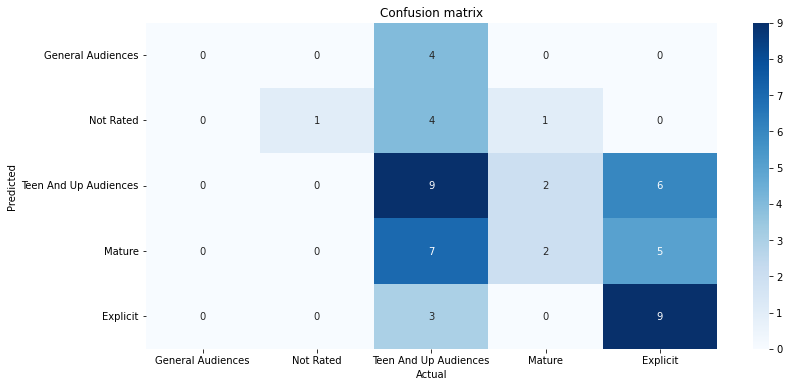

In [73]:
aux_df = df_clean[['rating', 'Rating_Code']].drop_duplicates().sort_values('Rating_Code')
conf_matrix = confusion_matrix(labels_test, knnc_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['rating'].values, 
            yticklabels=aux_df['rating'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [74]:
base_model = KNeighborsClassifier()
base_model.fit(features_train, labels_train)
accuracy_score(labels_test, base_model.predict(features_test))

0.2641509433962264

In [75]:
best_knnc.fit(features_train, labels_train)
accuracy_score(labels_test, best_knnc.predict(features_test))

0.39622641509433965

We can see that the default model (with 5 Nearest Neighbors) performs better. However, in our Grid Search Cross Validation process we tried with that number of neighbors. The reason why we may be getting this result is because de Grid Search performs a Cross Validation scheme, while this last comparison uses all training data.

We'll create a dataset with a model summary to compare models:

In [76]:
d = {
     'Model': 'KNN',
     'Training Set Accuracy': accuracy_score(labels_train, best_knnc.predict(features_train)),
     'Test Set Accuracy': accuracy_score(labels_test, knnc_pred)
}

df_models_knnc = pd.DataFrame(d, index=[0])

In [77]:
df_models_knnc

,Model,Training Set Accuracy,Test Set Accuracy
0,KNN,0.433898,0.396226


In [78]:
import pickle
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### Waverly: Okay this did pretty badly.... I think I need more data to predict rating :0

Waverly: Before I do that I want to try how random forest does on this rating then I'll scrape more. 

In [79]:
print(features_train.shape)
print(features_test.shape)


(295, 300)
(53, 300)


Cross-Validation for Hyperparameter tuning
First, we can see what hyperparameters the model has:

In [80]:
rf_0 = RandomForestClassifier(random_state = 8)

print('Parameters currently in use:\n')
pprint(rf_0.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 8,
 'verbose': 0,
 'warm_start': False}


We'll tune the following ones:

n_estimators = number of trees in the forest.

max_features = max number of features considered for splitting a node

max_depth = max number of levels in each decision tree

min_samples_split = min number of data points placed in a node before the node is split

min_samples_leaf = min number of data points allowed in a leaf node

bootstrap = method for sampling data points (with or without replacement)

Randomized Search Cross Validation
We first need to define the grid:

In [81]:
# n_estimators
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]

# max_features
max_features = ['auto', 'sqrt']

# max_depth
max_depth = [int(x) for x in np.linspace(20, 100, num = 5)]
max_depth.append(None)

# min_samples_split
min_samples_split = [2, 5, 10]

# min_samples_leaf
min_samples_leaf = [1, 2, 4]

# bootstrap
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [20, 40, 60, 80, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000]}


Then, we'll perform the Random Search:

In [82]:
## Try again with a bigger dataset and save the models?
# First create the base model to tune
rfc = RandomForestClassifier(random_state=8)

# Definition of the random search
random_search = RandomizedSearchCV(estimator=rfc,
                                   param_distributions=random_grid,
                                   n_iter=50,
                                   scoring='accuracy',
                                   cv=3, 
                                   verbose=1, 
                                   random_state=8)

# Fit the random search model
random_search.fit(features_train, labels_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=8),
                   n_iter=50,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [20, 40, 60, 80, 100,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]},
                   random_state=8, scoring='accuracy', verbose=1)

In [83]:
print("The best hyperparameters from Random Search are:")
print(random_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(random_search.best_score_)

The best hyperparameters from Random Search are:
{'n_estimators': 600, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}

The mean accuracy of a model with these hyperparameters is:
0.4271284271284272


Grid Search Cross Validation

In [97]:
# Create the parameter grid based on the results of random search 
bootstrap = [False]
max_depth = [30, 40, 50]
max_features = ['sqrt']
min_samples_leaf = [1, 2, 4]
min_samples_split = [5, 10, 15]
n_estimators = [800]

param_grid = {
    'bootstrap': bootstrap,
    'max_depth': max_depth,
    'max_features': max_features,
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split': min_samples_split,
    'n_estimators': n_estimators
}

# Create a base model
rfc = RandomForestClassifier(random_state=8)

# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rfc, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(features_train, labels_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=8, test_size=0.33, train_size=None),
             estimator=RandomForestClassifier(random_state=8),
             param_grid={'bootstrap': [False], 'max_depth': [30, 40, 50],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [5, 10, 15],
                         'n_estimators': [800]},
             scoring='accuracy', verbose=1)

In [98]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

The best hyperparameters from Grid Search are:
{'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 800}

The mean accuracy of a model with these hyperparameters is:
0.4115646258503401


In [99]:
best_rfc = grid_search.best_estimator_

In [100]:
best_rfc

RandomForestClassifier(bootstrap=False, max_depth=30, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=800, random_state=8)

Model fit and performance
Now, we can fit the model to our training data:

In [101]:
best_rfc.fit(features_train, labels_train)

RandomForestClassifier(bootstrap=False, max_depth=30, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=800, random_state=8)

In [102]:
rfc_pred = best_rfc.predict(features_test)

In [103]:
# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(labels_train, best_rfc.predict(features_train)))

The training accuracy is: 
1.0


In [104]:
# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(labels_test, rfc_pred))

The test accuracy is: 
0.32075471698113206


In [105]:
# Classification report
print("Classification report")
print(classification_report(labels_test,rfc_pred))

Classification report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         6
           2       0.29      0.59      0.39        17
           3       0.25      0.07      0.11        14
           4       0.50      0.50      0.50        12

    accuracy                           0.32        53
   macro avg       0.21      0.23      0.20        53
weighted avg       0.27      0.32      0.27        53



/Users/waverlywang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/waverlywang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/waverlywang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


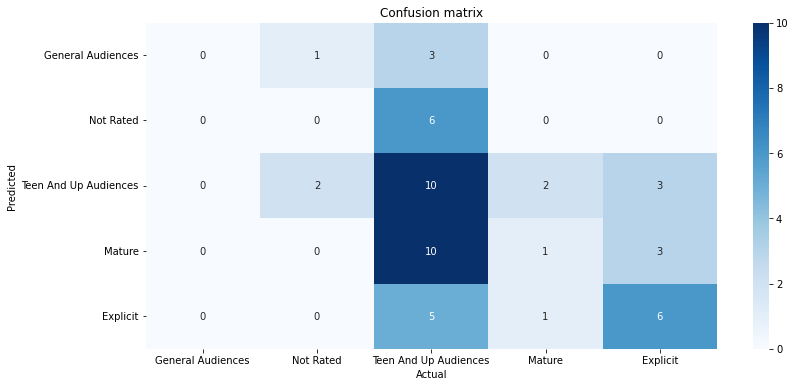

In [112]:
aux_df = df_clean[['rating', 'Rating_Code']].drop_duplicates().sort_values('Rating_Code')
conf_matrix = confusion_matrix(labels_test, rfc_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['rating'].values, 
            yticklabels=aux_df['rating'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [107]:
base_model = RandomForestClassifier(random_state = 8)
base_model.fit(features_train, labels_train)
accuracy_score(labels_test, base_model.predict(features_test))

0.33962264150943394

In [108]:
best_rfc.fit(features_train, labels_train)
accuracy_score(labels_test, best_rfc.predict(features_test))

0.32075471698113206

In [109]:
d = {
     'Model': 'Random Forest',
     'Training Set Accuracy': accuracy_score(labels_train, best_rfc.predict(features_train)),
     'Test Set Accuracy': accuracy_score(labels_test, rfc_pred)
}

df_models_rfc = pd.DataFrame(d, index=[0])

In [110]:
df_models_rfc

,Model,Training Set Accuracy,Test Set Accuracy
0,Random Forest,1.0,0.320755


In [ ]:
##defintely some overfitting going on....

In [96]:
with open('Models/best_rfc.pickle', 'wb') as output:
    pickle.dump(best_rfc, output)
    
with open('Models/df_models_rfc.pickle', 'wb') as output:
    pickle.dump(df_models_rfc, output)

FileNotFoundError: [Errno 2] No such file or directory: 'Models/best_rfc.pickle'

## I'll just save the best of the classifiers for each category

## I won't save any of the rating classifiers because it's not very good  :( about 30 percent ... which is a failing grade
## I think I'll save the knn model for the fandom since it's good and got 93 percent.